### SAYANTAN RAHA
## Roll # : BAI09056
### IIMB - BAI09 - Assignment 5

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off Code"></form>''')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

In [4]:
pd.options.display.max_columns = None

In [5]:
data = pd.read_excel('./Clustering_Raw_data.xlsx', skiprows=1)

In [6]:
#display(data)

In [7]:
data.columns = [ 'Store_Id','Store_Area','Zone','Net_Sales_CRESCENT','Net_Sales_CRESCENT_MIX_N_MATCH',
                'Net_Sales_CRESCENT_POISE','Net_Sales_CRESCENT_SET','Net_Sales_BLINK','Net_Sales_SAHAR',
                'Discount_CRESCENT','Discount_CRESCENT_MIX_N_MATCH','Discount_CRESCENT_POISE',
                'Discount_CRESCENT_SET','Discount_BLINK','Discount_SAHAR','Cost_CRESCENT', 
                'Cost_CRESCENT_MIX_N_MATCH','Cost_CRESCENT_POISE','Cost_CRESCENT_SET','Cost_BLINK','Cost_SAHAR']

In [8]:
data.head()

,Store_Id,Store_Area,Zone,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR
0,1879,8154,EAST,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0
1,1885,11032,WEST,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0
2,1903,8374,EAST,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0
3,1911,4001,WEST,0.0,178680.82,0.0,25856.39,3499.06,0.0,0.0,130254.18,0.0,22296.61,2988.94,0.0,0.0,125563.52,0.0,19183.17,2861.93,0.0
4,1916,6603,NORTH,0.0,236793.24,0.0,68630.76,92294.53,0.0,0.0,130006.86,0.0,36949.24,54758.47,0.0,0.0,145940.63,0.0,43577.73,59467.68,0.0


# Q-PART A-1

## Feature Engineering

### Create Dummy variables / One Hot Encoding of Zone

In [9]:
data = pd.concat([data, pd.get_dummies(data.Zone)], axis = 'columns')
data.drop('Zone', axis = 1, inplace = True)
data.head(3)

,Store_Id,Store_Area,Net_Sales_CRESCENT,Net_Sales_CRESCENT_MIX_N_MATCH,Net_Sales_CRESCENT_POISE,Net_Sales_CRESCENT_SET,Net_Sales_BLINK,Net_Sales_SAHAR,Discount_CRESCENT,Discount_CRESCENT_MIX_N_MATCH,Discount_CRESCENT_POISE,Discount_CRESCENT_SET,Discount_BLINK,Discount_SAHAR,Cost_CRESCENT,Cost_CRESCENT_MIX_N_MATCH,Cost_CRESCENT_POISE,Cost_CRESCENT_SET,Cost_BLINK,Cost_SAHAR,EAST,NORTH,SOUTH,WEST
0,1879,8154,0.0,523481.52,0.0,224348.65,88251.23,0.0,0.0,253126.98,0.0,118631.45,47094.97,0.0,0.0,306384.07,0.0,133800.61,54759.22,0.0,1,0,0,0
1,1885,11032,0.0,479126.98,0.0,224900.11,151922.16,0.0,0.0,268027.62,0.0,138734.19,85510.84,0.0,0.0,295953.89,0.0,145927.35,99258.18,0.0,0,0,0,1
2,1903,8374,0.0,456677.50,0.0,245383.60,109682.23,0.0,0.0,191772.60,0.0,113301.20,49827.27,0.0,0.0,255847.23,0.0,141408.60,65928.58,0.0,1,0,0,0


### Profitability / Store Area Unit Calculation

We will now calculate the per unit are profitability of Store. The following formula is used to calculate the same:
- Profitability_Cresent = (Net Sales of Cresent - Cost of Cresent) / Total Area of the Store
- We will create 6 such variables for each product

In [10]:
data['Profit_C_SA'] = (data['Net_Sales_CRESCENT'] - data['Cost_CRESCENT'])/ data['Store_Area']
data['Profit_C_MNM_SA'] = (data['Net_Sales_CRESCENT_MIX_N_MATCH'] - data['Cost_CRESCENT_MIX_N_MATCH'])/ data['Store_Area']
data['Profit_C_P_SA'] = (data['Net_Sales_CRESCENT_POISE'] - data['Cost_CRESCENT_POISE'])/ data['Store_Area']
data['Profit_C_S_SA'] = (data['Net_Sales_CRESCENT_SET'] - data['Cost_CRESCENT_SET'])/ data['Store_Area']
data['Profit_B_SA'] = (data['Net_Sales_BLINK'] - data['Cost_BLINK'])/ data['Store_Area']
data['Profit_S_SA'] = (data['Net_Sales_SAHAR'] - data['Cost_SAHAR'])/ data['Store_Area']

data[[c for c in data.columns if 'Profit' in c]].head(3)

,Profit_C_SA,Profit_C_MNM_SA,Profit_C_P_SA,Profit_C_S_SA,Profit_B_SA,Profit_S_SA
0,0.0,26.624657,0.0,11.104739,4.107433,0.0
1,0.0,16.603797,0.0,7.158517,4.773747,0.0
2,0.0,23.982597,0.0,12.416408,5.224940,0.0


### Discount / Total Sales (Discount Sensitivity)
- Discount Sensitivity is calculated as Revenue earned by Sales of Product on Discount / Total revue from Product
- We will create 6 such variable for 6 different products

In [11]:
data['Sens_C_SA'] = data['Discount_CRESCENT']/ (data['Net_Sales_CRESCENT'])
data['Sens_C_MNM_SA'] = data['Discount_CRESCENT_MIX_N_MATCH'] / (data['Net_Sales_CRESCENT_MIX_N_MATCH'])
data['Sens_C_P_SA'] = data['Discount_CRESCENT_POISE'] / (data['Net_Sales_CRESCENT_POISE'])
data['Sens_C_S_SA'] =  data['Discount_CRESCENT_SET'] / (data['Net_Sales_CRESCENT_SET'])
data['Sens_B_SA'] =  data['Discount_BLINK'] / (data['Net_Sales_BLINK'])
data['Sens_S_SA'] =  data['Discount_SAHAR'] / (data['Net_Sales_SAHAR'])
data.fillna(0, inplace = True)
data[[c for c in data.columns if 'Sens' in c]].head(3)

,Sens_C_SA,Sens_C_MNM_SA,Sens_C_P_SA,Sens_C_S_SA,Sens_B_SA,Sens_S_SA
0,0.0,0.483545,0.0,0.528782,0.533647,0.0
1,0.0,0.559408,0.0,0.616870,0.562860,0.0
2,0.0,0.419930,0.0,0.461731,0.454288,0.0


##### All Fields Used
- Net Revenue
- Discount Revenue
- Cost
- Store Area
- Sore Zones

# Q-PART A-2

For the purpose of this analysis we are only considering Outliers from a **Univariate Analysis** perspective. There are ways to perform multivariate outlier analysis using Isolation Forest / Gaussian Mixture models, but such analysis is being considered out of scope of current work

- UNIVARIATE Outlier Analysis

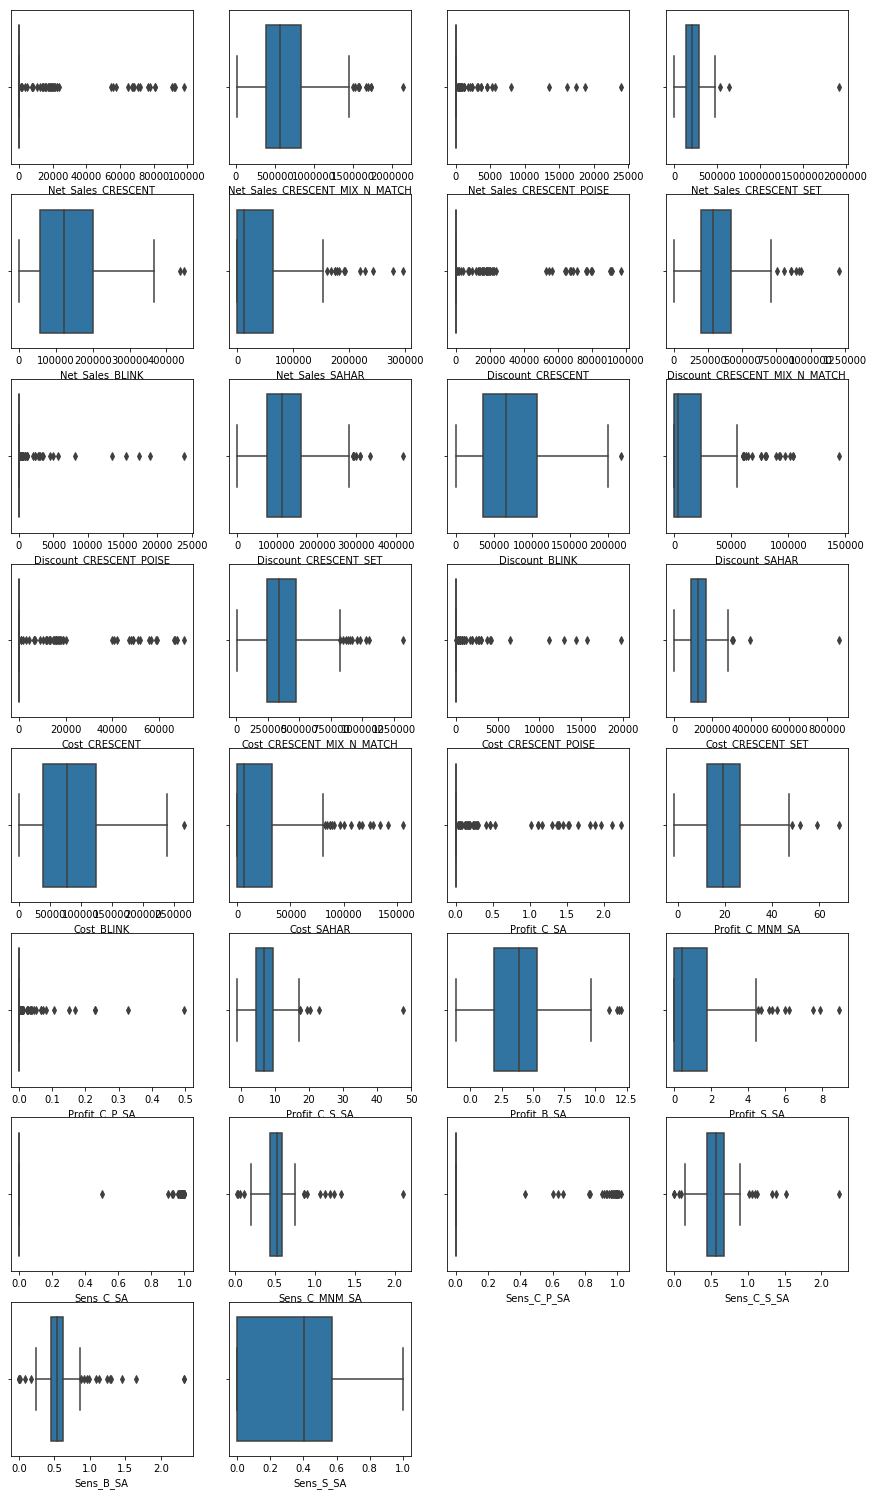

In [12]:
cols = ['Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA']

plt.figure(figsize = (15,30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

#### Outlier Effect
Outliers effect the position on the Centroids particularly for Clustering Algorithms like Kmeans. 
Imagine we have a dataset containing 2 clusters, Gaussian point clouds. We want to find 2 clusters in the data using K-means. However, say there's also a single outlier, located very far from either of the 'true' clusters. Maybe millions of times further away from any other point than any other points are to each other. If we chose the centroids to be the centers of the true clusters (the best 'representative' configuration), the value of the loss function would be very high. The loss function is the sum of squared distances from each point to its assigned cluster centroid. It would be high because the outlier is so far from the nearest centroid. Therefore, K-means would reduce the loss function by choosing the outlier itself to be one of centroids, and placing the other centroid somewhere in the middle of the remaining data. This configuration is clearly not representative of the the underlying distribution, but a pathological situation caused by the presence of a single outlier.

Partition around Medoids and Hierarchial clustering are more robust to outliers.

There are two easy approaches to deal with outliers:

1. Remove the Data points. The problem of such appoaches mean we will be loosing may data points (i.e. Store data) which is unacceptable
2. An alternative and an acceptable option is to clamp the values less than $\mu - 3* \sigma$ to $\mu - 3* \sigma$ and values greater than $\mu + 3* \sigma$ to $\mu + 3* \sigma$

In [13]:
def treat_outliers(y):
    miny = np.mean(y) - 3 * np.std(y)
    maxy = np.mean(y) + 3 * np.std(y)
    y[y < miny] = miny
    y[y > maxy] = maxy
    return(y)
    
for c in cols:
    data[c+'_outlier_treated'] = treat_outliers(data[c].copy())

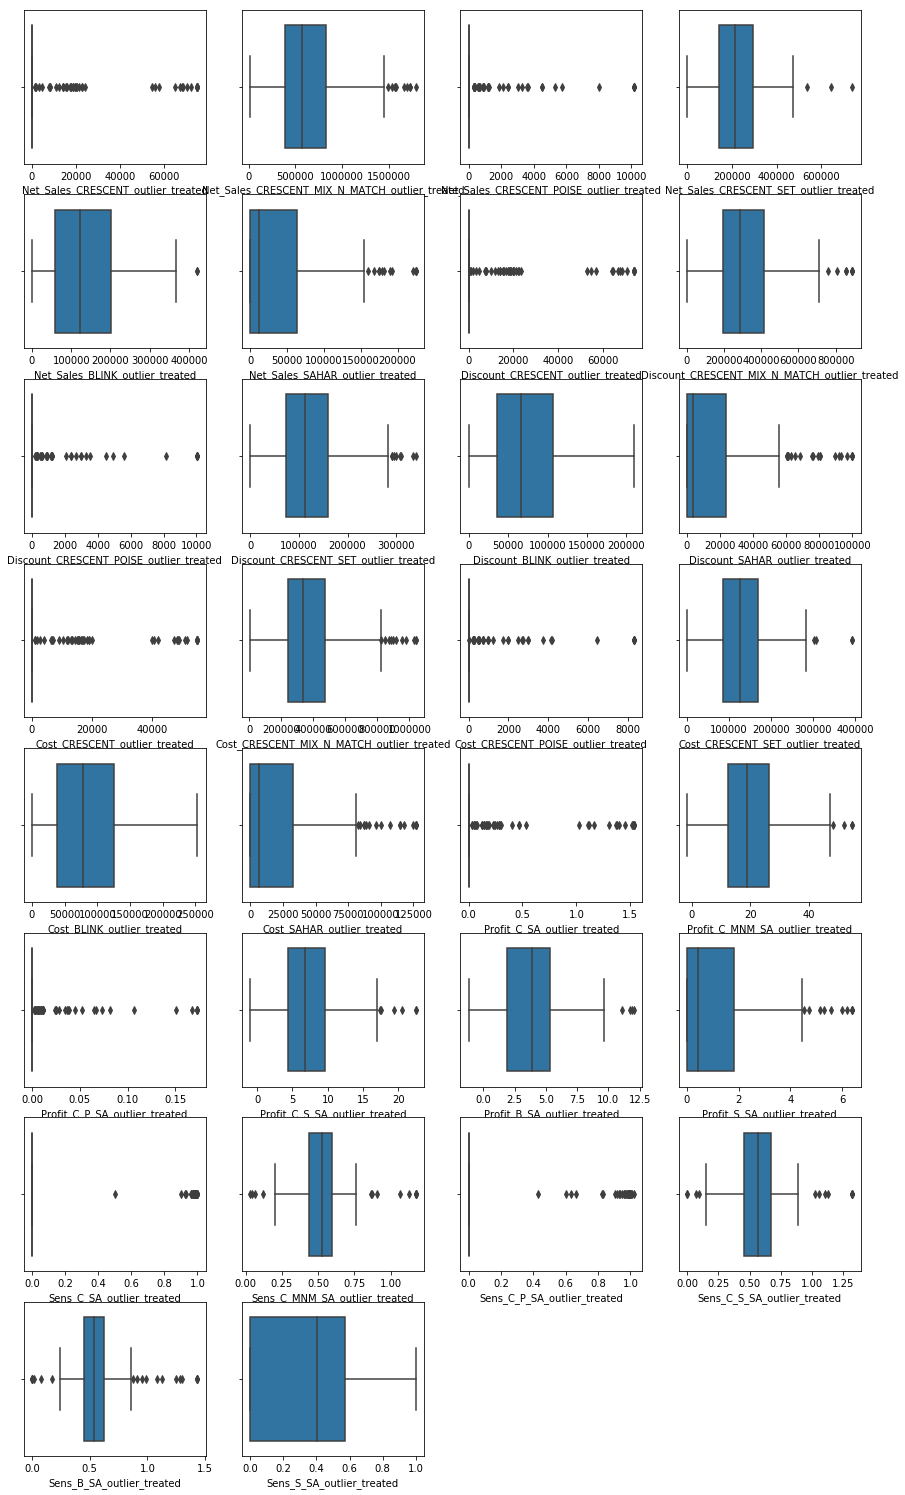

In [14]:
cols = [c for c in data.columns if '_outlier_' in c]
plt.figure(figsize = (15, 30))
for i, c in zip(range(len(cols)), cols):
    plt.subplot(9,4,i+1)
    sns.boxplot(x = c, data = data)
plt.show()

# Q-PART A-3 - Hierarchial Clustering

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.cm as cm
cols = ['EAST', 'NORTH', 'SOUTH', 'WEST',
       'Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
cols2 = ['Store_Area',       'Net_Sales_CRESCENT_outlier_treated',
       'Net_Sales_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Net_Sales_CRESCENT_POISE_outlier_treated',
       'Net_Sales_CRESCENT_SET_outlier_treated',
       'Net_Sales_BLINK_outlier_treated', 'Net_Sales_SAHAR_outlier_treated',
       'Discount_CRESCENT_outlier_treated',
       'Discount_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Discount_CRESCENT_POISE_outlier_treated',
       'Discount_CRESCENT_SET_outlier_treated',
       'Discount_BLINK_outlier_treated', 'Discount_SAHAR_outlier_treated',
       'Cost_CRESCENT_outlier_treated',
       'Cost_CRESCENT_MIX_N_MATCH_outlier_treated',
       'Cost_CRESCENT_POISE_outlier_treated',
       'Cost_CRESCENT_SET_outlier_treated', 'Cost_BLINK_outlier_treated',
       'Cost_SAHAR_outlier_treated', 'Profit_C_SA_outlier_treated',
       'Profit_C_MNM_SA_outlier_treated', 'Profit_C_P_SA_outlier_treated',
       'Profit_C_S_SA_outlier_treated', 'Profit_B_SA_outlier_treated',
       'Profit_S_SA_outlier_treated', 'Sens_C_SA_outlier_treated',
       'Sens_C_MNM_SA_outlier_treated', 'Sens_C_P_SA_outlier_treated',
       'Sens_C_S_SA_outlier_treated', 'Sens_B_SA_outlier_treated',
       'Sens_S_SA_outlier_treated']
X = data[cols]
for c in cols2:
    X[c] = StandardScaler().fit_transform(X[c].values.reshape(-1,1))

X['EAST'] = X['EAST'].astype(float)
X['NORTH'] = X['NORTH'].astype(float)
X['SOUTH'] = X['SOUTH'].astype(float)
X['WEST'] = X['WEST'].astype(float)

#### Process of proceeding with Hierarchial Clustering
- STEP 1: We will first determine which is the best linkage method
    - Methods to assess:
        - average
        - single
        - complete
        - ward

[1] "Loss from each of Linkage Methods: "
  average    single  complete      ward 
0.7931258 0.6205850 0.8610755 0.9479765 


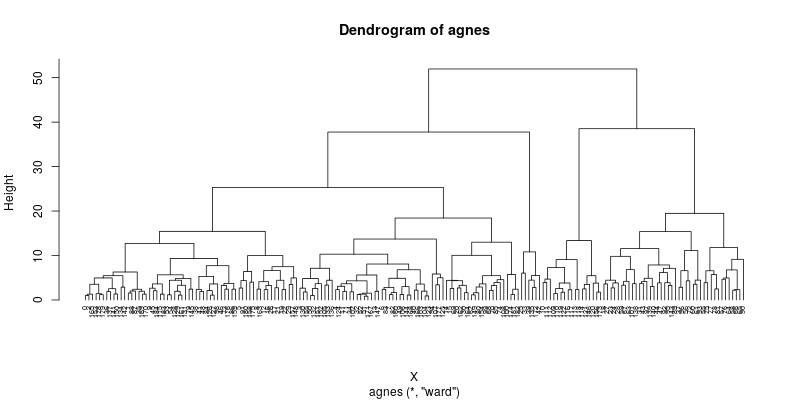

In [16]:
%%R -i X -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(X, method = x)$ac
}
print("Loss from each of Linkage Methods: ")
print(map_dbl(m, ac))
##   average    single  complete      ward 
## 0.7379371 0.6276128 0.8531583 0.9346210


# Hierarchical clustering using Complete Linkage
hc3 <- agnes(X, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

##### From the Results above it is clear "WARD" linkage is performing better than the other linkage options (Values indicate Clustering Coefficient, the closer it is to 1, the better it is)

- STEP 2: Determine the Optimal number of Clusters / Subgroups
    - Methods to be used:
        - SCREE Plot / Elbow Plot
        - Elbow Method

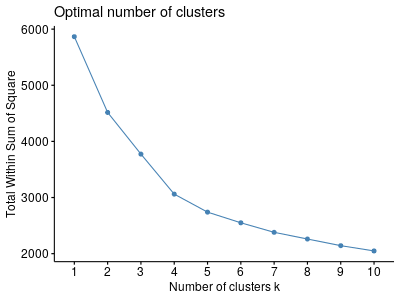

In [17]:
%%R -i X -w 400 -h 300
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

fviz_nbclust(X, FUN = hcut, method = "wss")

#fviz_nbclust(X, FUN = hcut, method = "silhouette")


- As we can see there is no specific Elbow and the curve gently slopes down. The lowest error value is @10, but that will mean too few records in each cluster. **4 / 5 ** can be considered as a good number from the above plot, but it is not very clear

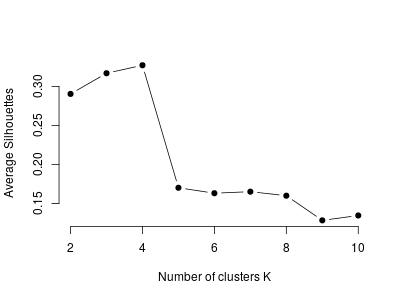

In [18]:
%%R -i X -w 400 -h 300
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

#fviz_nbclust(X, FUN = hcut, method = "silhouette")
d <- dist(X, method = "euclidean")

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- hclust(d, method = "ward" )
  ss <- silhouette(cutree(km.res, k), dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")


- The Silhouette gives a more clear value of 4 as the optimal number of Clusters.

**Between the two options, since the Average Silhouette Width gives a more clear solution, we will adopt this as the strategy for selecting optimal cut points**

OPTIMAL CUTPOINTS = **4**

[1] "Number of members in each cluster"
sub_grp
  1   2   3   4 
125  17  37   6 


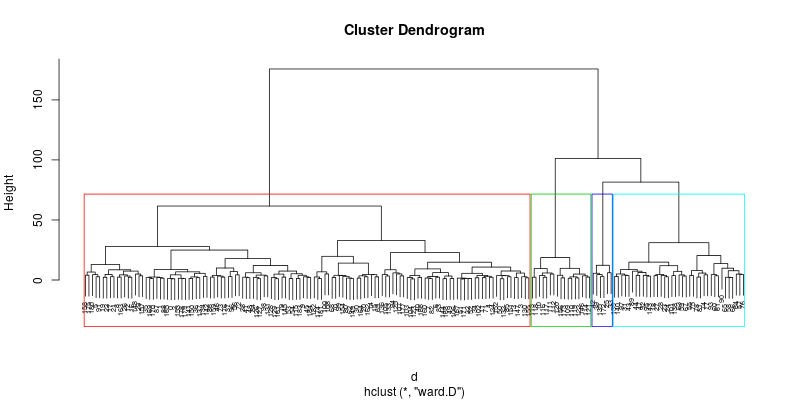

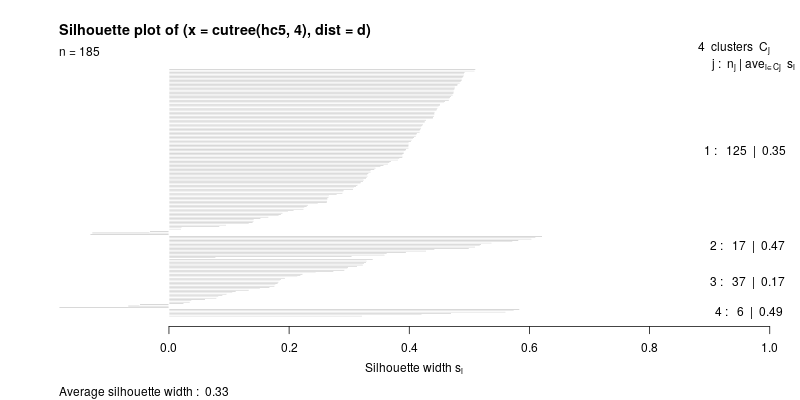

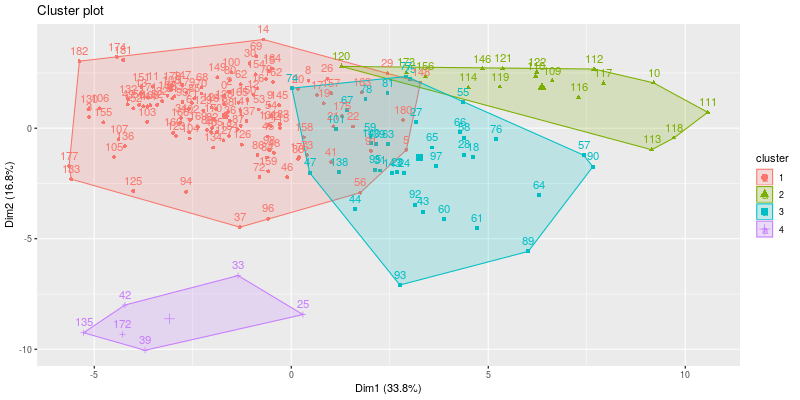

In [19]:
%%R -i X -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

print("Number of members in each cluster")
print(table(sub_grp))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = sub_grp) %>%
  head

plot(hc5, cex = 0.6)
rect.hclust(hc5, k = 4,border = 2:5)

plot(silhouette(cutree(hc5,4),d))

fviz_cluster(list(data = X, cluster = sub_grp))


# Q-PART A-4
- We will try to determine the number of clusters first using Average Silhouette width metrics

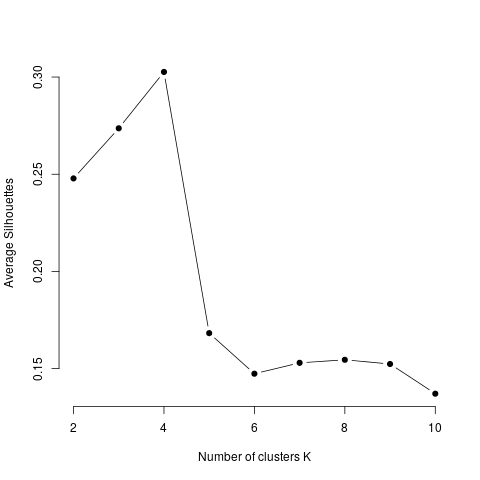

In [20]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- pam(X, k)
  ss <- silhouette(km.res$clustering, dist(X))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:10

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

OPTIMAL CUTPOINTS = **4**

[1] "Number of members in each cluster"

  1   2   3   4 
108  53  18   6 


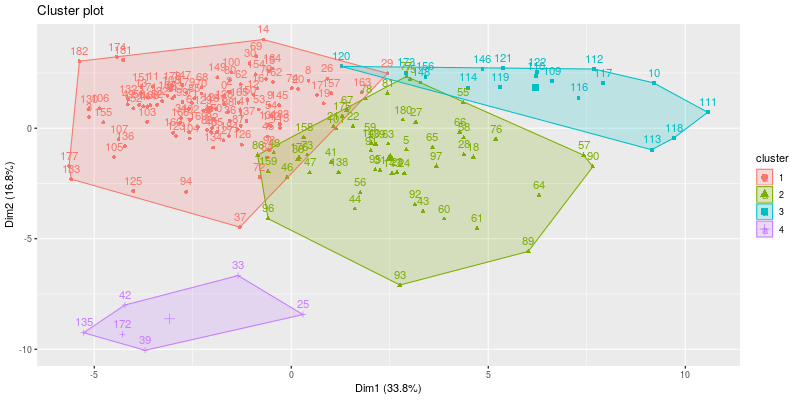

In [21]:
%%R -i X  -w 800 -h 400
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Ward's method
hc5 <- pam(X, 4)

print("Number of members in each cluster")
print(table(hc5$clustering))
## sub_grp
##  1  2  3  4 
##  7 12 19 12

X %>%
  mutate(cluster = hc5$clustering) %>%
  head

fviz_cluster(list(data = X, cluster = hc5$clustering))

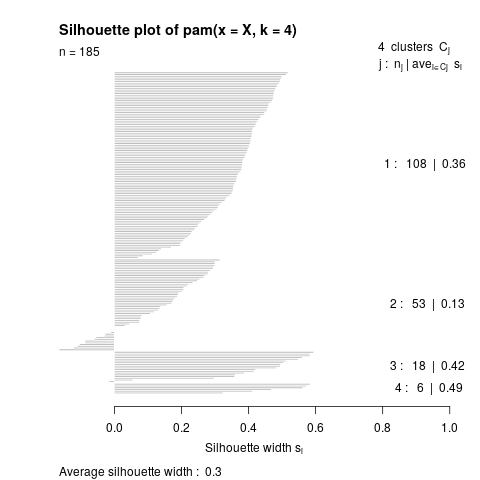

In [22]:
%%R -i X
library(cluster)
options(warn=-1)

set.seed(123)
pam = pam(X, 4)
plot(silhouette(pam), color=c('red'))

##### Advantages of using partitioning around medoids (PAM) over K-means

Both k-means and PAM algorithms are breaking the dataset up into k groups. Also, they are both trying to minimize the distance between points of the same cluster and a particular point which is the center of that cluster. In contrast to the k-means algorithm, PAM algorithm chooses points as centers that belong to the dastaset. PAM algorithm uses a greedy search which may not find the global optimum solution. Medoids are more robust to outliers than centroids, but they need more computation for high dimensional data.



# Q-PART A-5

From the solution in Q3 and Q4 we see that the Average Silhouette Value for the hierarchial clustering is around .33, while that from partition around medoids is .31.

Range of Silhouette	Interpretation can be considered as follows:
- 0.71-1.0  ==> A strong structure has been found
- 0.51-0.70 ==> A reasonable structure has been found
- 0.26-0.50 ==> The structure is weak and could be artificial
- < 0.25    ==> No substantial structure has been found

From the chart above we can conclude that Hierarchial Clustering and PAM is able to identify some sort of weak structures. However Hierarchial clustering is able to identify slightly better clusters based on Silhouette value. Hence Hierarchial Clustering is the better option for clustering for this dataset.

# Q-PART A-6

In [23]:
%%R -i X -w 800 -h 600 -o Xo
#install.packages(c("factoextra","dendextend"))
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering visualization
library(dendextend) # for comparing two dendrograms

#str(X)

# Dissimilarity matrix
d <- dist(X, method = "euclidean")

# Ward's method
hc5 <- hclust(d, method = "ward" )

# Cut tree into 4 groups
sub_grp <- cutree(hc5, k = 4)

X %>%
  mutate(cluster = sub_grp) %>%
  head

X$Cluster = sub_grp
Xo = X
#print(Xo)

In [24]:
data['cluster'] = Xo['Cluster'].values

In [25]:
cols = ['Store_Area', 'EAST', 'NORTH', 'SOUTH', 'WEST', 'Net_Sales_CRESCENT',
       'Net_Sales_CRESCENT_MIX_N_MATCH', 'Net_Sales_CRESCENT_POISE',
       'Net_Sales_CRESCENT_SET', 'Net_Sales_BLINK', 'Net_Sales_SAHAR',
       'Discount_CRESCENT', 'Discount_CRESCENT_MIX_N_MATCH',
       'Discount_CRESCENT_POISE', 'Discount_CRESCENT_SET', 'Discount_BLINK',
       'Discount_SAHAR', 'Cost_CRESCENT', 'Cost_CRESCENT_MIX_N_MATCH',
       'Cost_CRESCENT_POISE', 'Cost_CRESCENT_SET', 'Cost_BLINK', 'Cost_SAHAR',
       'Profit_C_SA', 'Profit_C_MNM_SA',
       'Profit_C_P_SA', 'Profit_C_S_SA', 'Profit_B_SA', 'Profit_S_SA',
       'Sens_C_SA', 'Sens_C_MNM_SA', 'Sens_C_P_SA', 'Sens_C_S_SA', 'Sens_B_SA',
       'Sens_S_SA', 'cluster']

In [26]:
pd.options.display.max_rows = None

data[cols].groupby('cluster').agg([np.mean, 'count']).T

cluster                                           1             2  \
Store_Area                     mean    11036.920000  1.381159e+04   
                               count     125.000000  1.700000e+01   
EAST                           mean        0.200000  0.000000e+00   
                               count     125.000000  1.700000e+01   
NORTH                          mean        0.248000  0.000000e+00   
                               count     125.000000  1.700000e+01   
SOUTH                          mean        0.312000  1.000000e+00   
                               count     125.000000  1.700000e+01   
WEST                           mean        0.240000  0.000000e+00   
                               count     125.000000  1.700000e+01   
Net_Sales_CRESCENT             mean     2548.172400  7.470936e+04   
                               count     125.000000  1.700000e+01   
Net_Sales_CRESCENT_MIX_N_MATCH mean   463537.389600  1.350839e+06   
                               count     125.000000  1.700000e+01   
Net_Sales_CRESCENT_POISE       mean      223.487360  1.127529e+02   
                               count     125.000000  1.700000e+01   
Net_Sales_CRESCENT_SET         mean   182438.500240  3.528298e+05   
                               count     125.000000  1.700000e+01   
Net_Sales_BLINK                mean   100583.815840  1.767445e+05   
                               count     125.000000  1.700000e+01   
Net_Sales_SAHAR                mean    12836.183040  7.198671e+04   
                               count     125.000000  1.700000e+01   
Discount_CRESCENT              mean     2499.227600  7.364964e+04   
                               count     125.000000  1.700000e+01   
Discount_CRESCENT_MIX_N_MATCH  mean   243125.824960  7.184721e+05   
                               count     125.000000  1.700000e+01   
Discount_CRESCENT_POISE        mean      212.584640  9.865882e+01   
                               count     125.000000  1.700000e+01   
Discount_CRESCENT_SET          mean   102573.761360  2.083284e+05   
                               count     125.000000  1.700000e+01   
Discount_BLINK                 mean    54529.247360  9.221618e+04   
                               count     125.000000  1.700000e+01   
Discount_SAHAR                 mean     5853.088960  3.270740e+04   
                               count     125.000000  1.700000e+01   
Cost_CRESCENT                  mean     2143.943280  5.421362e+04   
                               count     125.000000  1.700000e+01   
Cost_CRESCENT_MIX_N_MATCH      mean   278944.326800  8.257514e+05   
                               count     125.000000  1.700000e+01   
Cost_CRESCENT_POISE            mean      177.715680  8.763529e+01   
                               count     125.000000  1.700000e+01   
Cost_CRESCENT_SET              mean   111476.342240  2.144232e+05   
                               count     125.000000  1.700000e+01   
Cost_BLINK                     mean    63372.576880  1.099316e+05   
                               count     125.000000  1.700000e+01   
Cost_SAHAR                     mean     7448.353760  4.124455e+04   
                               count     125.000000  1.700000e+01   
Profit_C_SA                    mean        0.041443  1.530833e+00   
                               count     125.000000  1.700000e+01   
Profit_C_MNM_SA                mean       17.522134  3.938966e+01   
                               count     125.000000  1.700000e+01   
Profit_C_P_SA                  mean        0.003841  1.427989e-03   
                               count     125.000000  1.700000e+01   
Profit_C_S_SA                  mean        6.735747  1.029311e+01   
                               count     125.000000  1.700000e+01   
Profit_B_SA                    mean        3.440841  4.868295e+00   
                               count     125.000000  1.700000e+01   
Profit_S_SA                    mean        0.487314  2.247203e+00  

##### Cluster Characteristics

- Cluster 1:
    - Smaller Stores (Around 1100 Area on average)
    - Equally distributed across all zone. Slightly higher density in the Southern Zone
    - Third in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - All the above items are also sensitive to Discounts being offered, i.e. > 50% are sold on discount

- Cluster 2:
    - Largest Stores (Around 1800 Area on average)
    - All the stores are in Southern Zone
    - First in Profitability / Unit of Store Area
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products without Discount (except for Cresent Set) 

- Cluster 3:
    - Mid Sized Stores (Around 1380 Area on average)
    - More than 60% of Stores are in the Southern Zone, and another 25% in Western Zone. 2% presence in Northern Zone
    - Second in Profitability / Unit of Store Area
    - Highest revenue grosser across all stores on average
    - Majority of Revenue comes from Sales of Cresent Mix & match, Cresent Set and Blink (in the order as specified)
    - Its sells more than 50% of its products on Discount

- Cluster 4:
    - Mid Sized Stores (Around 1200 Area on average)
    - More than 33% of Stores are in the Western Zone, and another 33% in Eastern Zone.
    - Least in Profitability / Unit of Store Area
    - Lowest revenue grosser across all stores on average across most products
    - Its sells most of its products on Discount exceeding 90% only

# Q-PART B-7

In [27]:
data = pd.read_csv('./1.CRESCENT SET.CKD.csv')
#data.info()

### a. Relationship between Sales units(sales_units) & Discount % (discount_per)

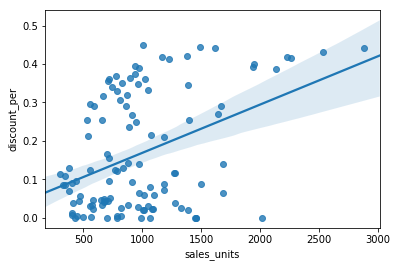

In [28]:
sns.regplot(x=(data['sales_units']), y=data['discount_per'], data=data)

In [29]:
print("Correlation between Sales Units and Disount % is : {}".format(data.discount_per.corr((data['sales_units']))))

Correlation between Sales Units and Disount % is : 0.40931870139375237


- Between Discount % 0- 10%: Sales units are more or less flat. It seems there is little effect of Discount on Sales Units
- Between Discount % 10- 40%: Sales units increase almost linearly with increase in discount
- Beyond 40%: Sales units taper off and becomes almost flat
- There is a correlation between Sales Unit and Discount Percentage

### b. Relationship between Sales units & Net Price (per_unit_netprice)

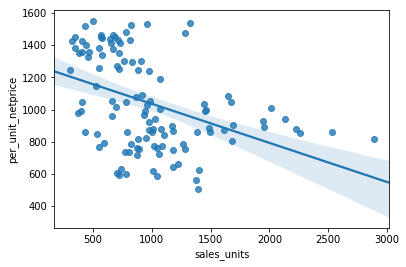

In [30]:
sns.regplot(x=(data['sales_units']), y=data['per_unit_netprice'], data=data)

In [31]:
print("Correlation between Sales Units and Net Price is : {}".format(data.per_unit_netprice.corr((data['sales_units']))))

Correlation between Sales Units and Net Price is : -0.41528964093754234


- There is a negative correlation between Sales Unit and Net Price
- As Per Unit Net Price reduces the number of sales units purchased increases
- There are some outliers / leverage points around 800-900 price-band

### c. Relationship between Sales units & Age (age)

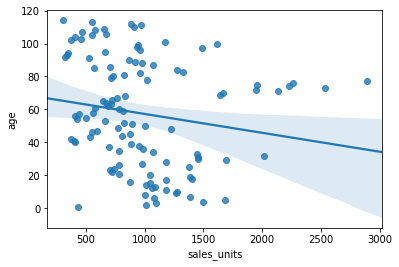

In [32]:
sns.regplot(x=(data['sales_units']), y=data['age'], data=data)

In [33]:
print("Correlation between Sales Units and Age is : {}".format(data.age.corr((data['sales_units']))))

Correlation between Sales Units and Age is : -0.17082320167216053


- There is a very weak but negative correlation between Age and Sales Units, with increasing age Sales Units reduce
- In general Sales Unit falls in a band between (400-900) for most ages
- There are breakouts from the above pattern leading to increased Sales Units
    - Period 10-23
    - Period 28-34
    - Period 69-78

# Q-PART B-8

##### Overfitting in Machine Learning

Overfitting refers to a model that fits / models the training data too well almost perfectly.

##### Consequences of Overfitting

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

##### Underfitting in Machine Learning

Underfitting refers to a model that can neither model the training data nor generalize to new data.
An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

##### Example below

First, we need a "true" relationship. We define a curve, in this case a sine curve to serve as our process that generates the data. As the real-world is never perfectly clean however, we also need to add some noise into the observations. This is done by adding a small random number to each value.

**Polynomial Model**
We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power to for the x-values. A line has a degree of 1 because it is of the form $y = b_1*x + b_0$ where $b_1$ is the slope and $b_0$ is the intercept. A third degree polynomial would have the form $y = b_3 * x^3 + b_2 * x^2 + b_1 * x + b_0$ and so on. The higher the degree of the polynomial, the more flexible the model. A more flexible model is prone to overfitting because it can can "bend" to follow the training data.
The following function creates a polynomial with the specified number of degrees and plots the results. We can use these results to determine the optimal degrees to achieve the right balance between over and underfitting.

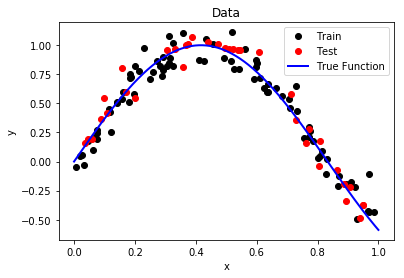

In [34]:
# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Training and testing observations
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calculate the cross validation score
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Training predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

##### Try Model with Different Degrees
- Degrees = 1 -> Underfitting
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


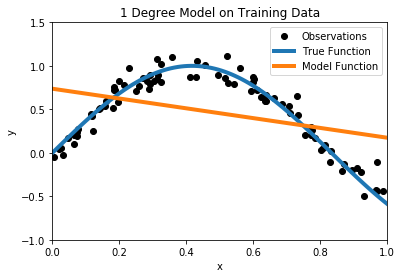

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

##### Degrees = 25 -> Overfitting

- We can go in the completely opposite direction and create a model that overfits the data. This model has too much flexibility and learns the training data too closely. As the training data has some amount of noise, it will end up capturing that noise and will be misled by that noise when it tries to make predictions on the test data.

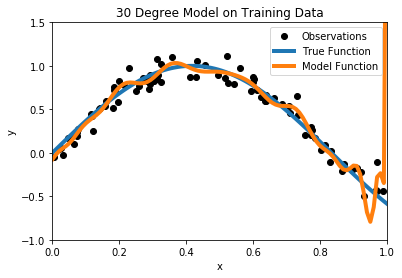

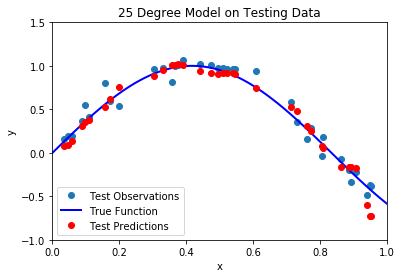

In [36]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 30)
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')


##### Degrees = 5 -> Balanced Model
Now that we have seen the two extremes, we can take a look at a model that does a good job of both accounting for the data while not following it too closely.

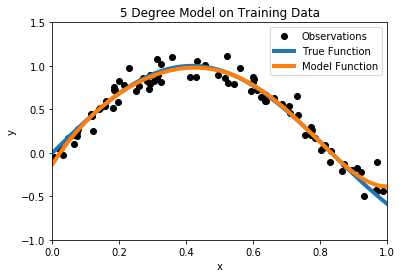

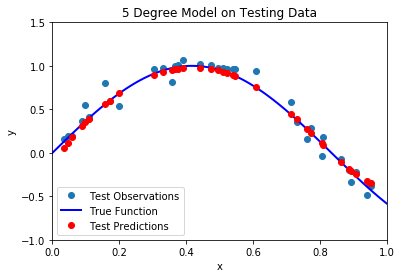

In [37]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 5)
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')


# Q-PART B-9

Separating data into training, validation and testing sets is an important part of evaluating analytics models. Typically, when we separate a data set into a training set, validation set and testing set, most of the data is used for training, and a smaller portion of the data is used for validation and testing.

After a model has been built by using the training set, we fine tune the model hyperparameters by making predictions against the validation set. This done to prevent the model from overfitting on the test set. 

The final prediction is done on the test set which acts as an unseen future set, and can be considered as a true measurement of the model performance on future unseen data.

For time series forcasting, we typically do not perform cross validation as it is important to capture the time component of the data. Data split is performed based on time.

# Q-PART B-10

Before performing Regression we will do the following:
- Check the data distributions
- Correlation among variables
- Plot the correlation heat map

In [38]:
data = pd.read_csv('./2.BLINK.HAREMS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
week                      114 non-null float64
cluster_id                114 non-null int64
brand                     114 non-null object
prod_brick                114 non-null object
sales_units               114 non-null int64
per_unit_grossprice       114 non-null float64
per_unit_netprice         114 non-null float64
per_unit_discountprice    114 non-null float64
discount_per              114 non-null float64
promo_week_flg            114 non-null int64
age                       114 non-null int64
week_no                   114 non-null int64
year_no                   114 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 11.7+ KB


In [39]:
data.head()

,week,cluster_id,brand,prod_brick,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age,week_no,year_no
0,9.2013,2,BLINK,HAREMS,38,596.368421,536.596053,59.772368,0.100227,0,1,9,2013
1,10.2013,2,BLINK,HAREMS,93,597.924731,566.334516,31.590215,0.052833,0,2,10,2013
2,11.2013,2,BLINK,HAREMS,122,600.639344,519.528115,81.111230,0.135041,0,3,11,2013
3,12.2013,2,BLINK,HAREMS,133,598.248120,541.940301,56.307820,0.094121,0,4,12,2013
4,13.2013,2,BLINK,HAREMS,130,591.307692,476.174077,115.133615,0.194710,0,5,13,2013


In [40]:
data['lag_1_sales_unit'] = data.sales_units.shift(1)
data['lag_1_discount_per'] = data.discount_per.shift(1)
data.head(5)

,week,cluster_id,brand,prod_brick,sales_units,per_unit_grossprice,per_unit_netprice,per_unit_discountprice,discount_per,promo_week_flg,age,week_no,year_no,lag_1_sales_unit,lag_1_discount_per
0,9.2013,2,BLINK,HAREMS,38,596.368421,536.596053,59.772368,0.100227,0,1,9,2013,NaN,NaN
1,10.2013,2,BLINK,HAREMS,93,597.924731,566.334516,31.590215,0.052833,0,2,10,2013,38.0,0.100227
2,11.2013,2,BLINK,HAREMS,122,600.639344,519.528115,81.111230,0.135041,0,3,11,2013,93.0,0.052833
3,12.2013,2,BLINK,HAREMS,133,598.248120,541.940301,56.307820,0.094121,0,4,12,2013,122.0,0.135041
4,13.2013,2,BLINK,HAREMS,130,591.307692,476.174077,115.133615,0.194710,0,5,13,2013,133.0,0.094121


In [41]:
data = data[['sales_units', 'discount_per', 'age', 'week_no', 'year_no', 'lag_1_sales_unit', 'lag_1_discount_per', 'promo_week_flg']]
data.head(3)

,sales_units,discount_per,age,week_no,year_no,lag_1_sales_unit,lag_1_discount_per,promo_week_flg
0,38,0.100227,1,9,2013,NaN,NaN,0
1,93,0.052833,2,10,2013,38.0,0.100227,0
2,122,0.135041,3,11,2013,93.0,0.052833,0


In [42]:
X_train = data[['week_no', 'year_no', 'sales_units', 'discount_per', 'age', 'lag_1_sales_unit', 'lag_1_discount_per', 'promo_week_flg']]

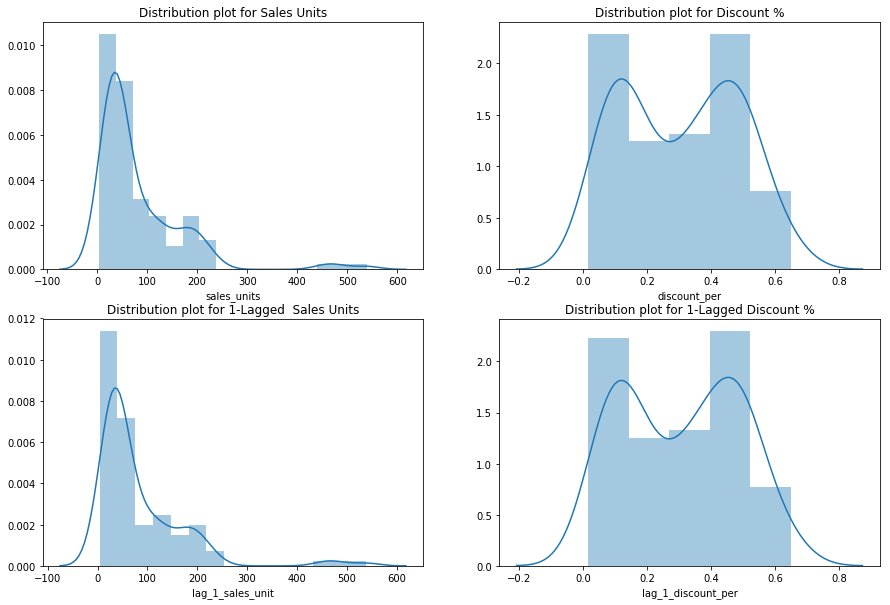

In [43]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
ax = plt.subplot("221")
ax.set_title("Distribution plot for Sales Units")
sns.distplot(X_train.sales_units)
ax = plt.subplot("222")
ax.set_title("Distribution plot for Discount %")
sns.distplot(X_train.discount_per)

ax = plt.subplot("224")
ax.set_title("Distribution plot for 1-Lagged Discount %")
sns.distplot(X_train.lag_1_discount_per.dropna())
ax = plt.subplot("223")
ax.set_title("Distribution plot for 1-Lagged  Sales Units")
sns.distplot(X_train.lag_1_sales_unit.dropna())

plt.show()

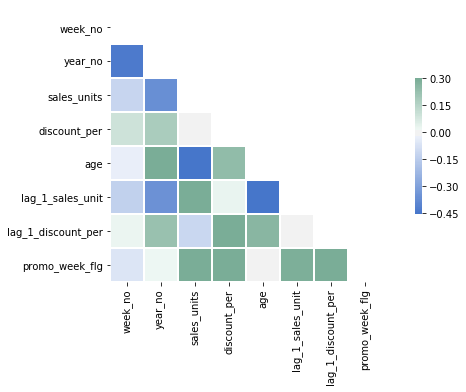

In [44]:
corr = X_train.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

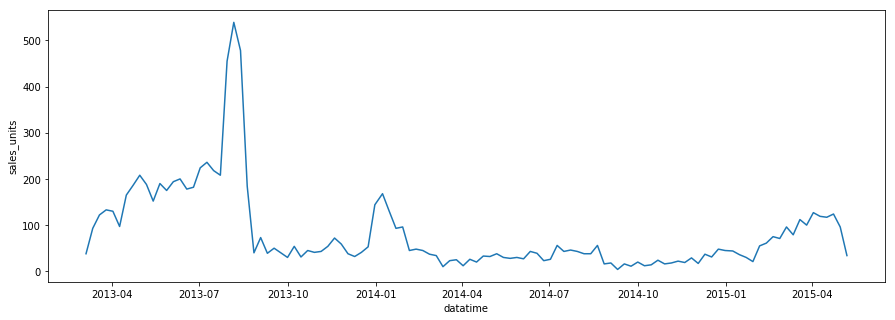

In [45]:
data['datatime']=pd.to_datetime(data.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(data.week_no.mul(7).astype(str) + ' days')

plt.figure(figsize=(15,5))
sns.lineplot(x='datatime', y='sales_units', data = data)
ax.set_title("Sales Unit vs Time")
plt.show()


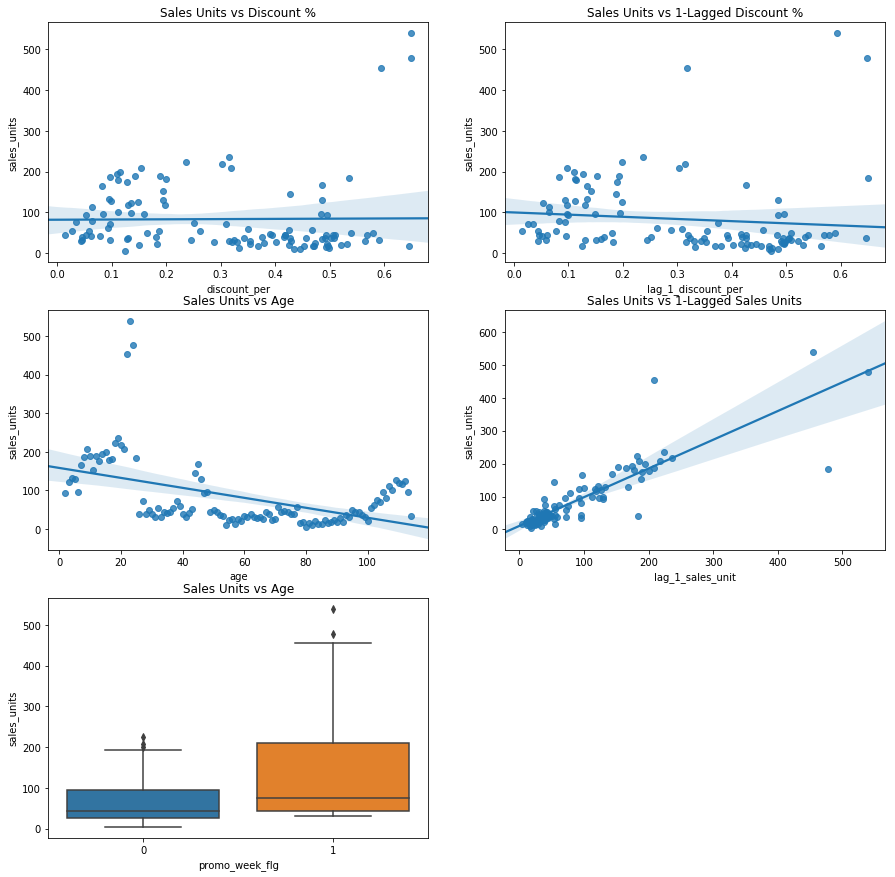

In [46]:
X_train.dropna(inplace=True)


fig = plt.figure(figsize=(15,15))
ax = plt.subplot("321")
ax.set_title("Sales Units vs Discount %")
sns.regplot(x='discount_per', y='sales_units', data = X_train)

ax = plt.subplot("322")
ax.set_title("Sales Units vs 1-Lagged Discount %")
sns.regplot(x='lag_1_discount_per', y='sales_units', data = X_train)

ax = plt.subplot("324")
ax.set_title("Sales Units vs 1-Lagged Sales Units")
sns.regplot(x='lag_1_sales_unit', y='sales_units', data = X_train)

ax = plt.subplot("323")
ax.set_title("Sales Units vs Age")
sns.regplot(x='age', y='sales_units', data = X_train)

ax = plt.subplot("325")
ax.set_title("Sales Units vs Age")

sns.boxplot(x='promo_week_flg', y='sales_units', data = X_train)

plt.show()

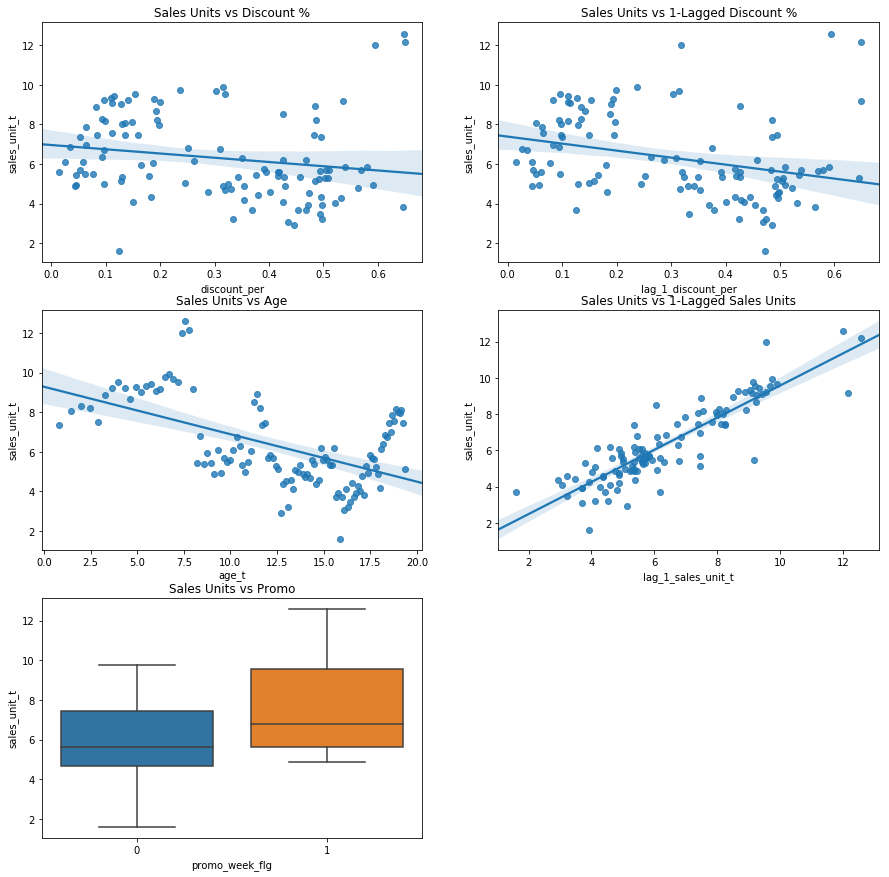

In [47]:
from scipy import stats


X_train['sales_unit_t'] = (X_train.sales_units**.2 - 1)/.2
X_train['lag_1_sales_unit_t'] = (X_train.lag_1_sales_unit**.2 - 1)/.2
X_train['age_t'] = (X_train.age**.5 - 1)/.5


fig = plt.figure(figsize=(15,15))
ax = plt.subplot("321")
ax.set_title("Sales Units vs Discount %")
sns.regplot(x='discount_per', y='sales_unit_t', data = X_train)

ax = plt.subplot("322")
ax.set_title("Sales Units vs 1-Lagged Discount %")
sns.regplot(x='lag_1_discount_per', y='sales_unit_t', data = X_train)

ax = plt.subplot("324")
ax.set_title("Sales Units vs 1-Lagged Sales Units")
sns.regplot(x='lag_1_sales_unit_t', y='sales_unit_t', data = X_train)

ax = plt.subplot("323")
ax.set_title("Sales Units vs Age")
sns.regplot(x='age_t', y='sales_unit_t', data = X_train)


ax = plt.subplot("325")
ax.set_title("Sales Units vs Promo")

sns.boxplot(x='promo_week_flg', y='sales_unit_t', data = X_train)

plt.show()

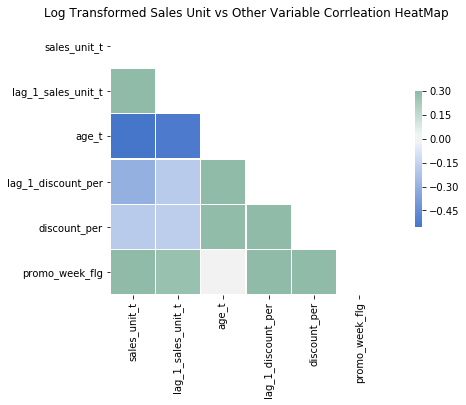

In [48]:
corr = X_train[['sales_unit_t', 'lag_1_sales_unit_t', 'age_t', 'lag_1_discount_per', 'discount_per', 'promo_week_flg']].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(255, 150, as_cmap=True)

ax.set_title("Log Transformed Sales Unit vs Other Variable Corrleation HeatMap")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

From the plot above we can see there is a wide distribution of data. Hence we will transform the data before modeling.
We will also check the correlations and other plots for the transformed variables.

We are using the following transformations:
- sales and Lagged Sales = $(sales^.2 - 1)/ .2$
- Age = $(sales^.5 - 1)/ .5$

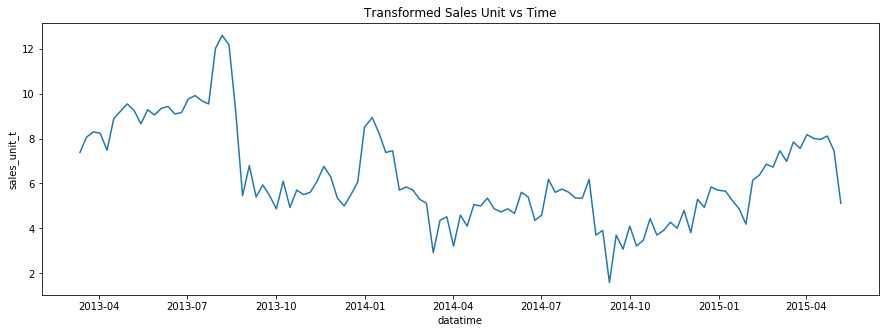

In [49]:
X_train['datatime']=pd.to_datetime(X_train.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_train.week_no.mul(7).astype(str) + ' days')

#data['sales_unit_t'] = np.log1p(data.sales_units)

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='sales_unit_t', data = X_train)
ax.set_title("Transformed Sales Unit vs Time")
plt.show()

#### Split and then do predictions
We will split the data as per the timeframes given in the questions


In [50]:
X_test = X_train.loc[(X_train.year_no.isin([2015]) & X_train.week_no.isin([1,2,3])) |
                    (X_train.year_no.isin([2014]) & X_train.week_no.isin([52]))]

y_test = X_test.sales_unit_t
val = X_test[['discount_per','age_t','lag_1_discount_per','lag_1_sales_unit_t', 'promo_week_flg']]
val

X_train = X_train.loc[(X_train.year_no.isin([2013])) |
                    (X_train.year_no.isin([2014]) & ~X_train.week_no.isin([52]))]


In [51]:
X_test

,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime
95,52,2014,45,0.569003,96,48.0,0.579305,1,5.705637,5.844718,17.595918,2014-12-31
96,1,2015,44,0.493558,97,45.0,0.569003,1,5.657628,5.705637,17.697716,2015-01-08
97,2,2015,36,0.491280,98,44.0,0.493558,1,5.238363,5.657628,17.798990,2015-01-15
98,3,2015,30,0.428839,99,36.0,0.491280,1,4.871752,5.238363,17.899749,2015-01-22


In [52]:
y = X_train.sales_unit_t
y.loc[y>X_train.sales_unit_t.mean()+3*X_train.sales_unit_t.std()] = X_train.sales_unit_t.mean()+3*X_train.sales_unit_t.std()
y.loc[y<X_train.sales_unit_t.mean()-3*X_train.sales_unit_t.std()] = X_train.sales_unit_t.mean()-3*X_train.sales_unit_t.std()

lag_1_sales_unit_t_max = X_train.lag_1_sales_unit_t.mean()+3*X_train.sales_unit_t.std()
lag_1_sales_unit_t_min = X_train.lag_1_sales_unit_t.mean()-3*X_train.sales_unit_t.std()

X_train.loc[X_train.lag_1_sales_unit_t<lag_1_sales_unit_t_min, 'lag_1_sales_unit_t'] = lag_1_sales_unit_t_min
X_train.loc[X_train.lag_1_sales_unit_t>lag_1_sales_unit_t_max, 'lag_1_sales_unit_t'] = lag_1_sales_unit_t_max

x = X_train[['discount_per','age_t','lag_1_discount_per','lag_1_sales_unit_t', 'promo_week_flg']]


Call:
lm(formula = .outcome ~ ., data = dat, verbose = FALSE)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2952 -0.3764  0.0433  0.4021  2.1517 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.39100    0.74643   5.883 7.15e-08 ***
discount_per        4.70057    0.91222   5.153 1.56e-06 ***
age_t              -0.19174    0.04306  -4.453 2.48e-05 ***
lag_1_discount_per -3.86310    0.91014  -4.245 5.41e-05 ***
lag_1_sales_unit_t  0.56967    0.07272   7.834 1.01e-11 ***
promo_week_flg      0.90968    0.26213   3.470 0.000807 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.778 on 88 degrees of freedom
Multiple R-squared:  0.8866,	Adjusted R-squared:  0.8802 
F-statistic: 137.6 on 5 and 88 DF,  p-value: < 2.2e-16

NULL
[1] 0.01529451


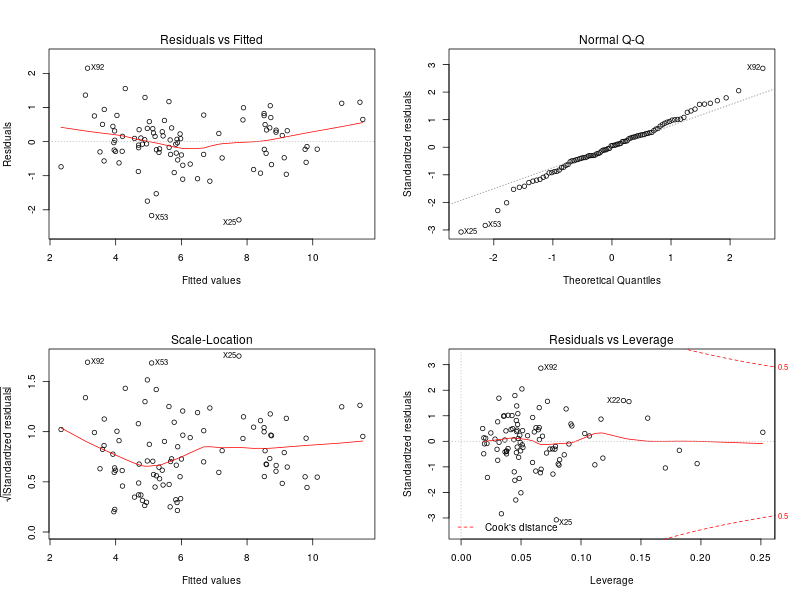

In [53]:
%%R -i x,val -i y,y_test -w 800 -h 600 -o trainop,testop
library(caret)
x = data.frame(x)
y = data.frame(y)
y$y = as.numeric(y$y)

#print(str(y$y))
#print(str(x))
objControl <- trainControl(method = "none", returnResamp = 'final',
                           summaryFunction = defaultSummary,
                           #summaryFunction = twoClassSummary, defaultSummary
                           classProbs = FALSE,
                           savePredictions = TRUE)
set.seed(766)
reg_caret_model <- train(x,
                      y$y,
                      method = 'lm',
                      trControl = objControl,
                      metric = "Rsquared",
                      tuneGrid = NULL,
                      verbose = FALSE)

#print(plot(varImp(reg_caret_model, scale = TRUE)))

print(summary(reg_caret_model))
par(mfrow = c(2, 2)) 
print(plot(reg_caret_model$finalModel))
#str(val)
trainop = predict(reg_caret_model, x)
testop1 = predict(reg_caret_model, val[1,])

val[2,'lag_1_sales_unit_t'] = testop1
testop2 =predict(reg_caret_model, val[2,])
val[3,'lag_1_sales_unit_t'] = testop2
testop3 =predict(reg_caret_model, val[3,])
val[4,'lag_1_sales_unit_t'] = testop3
testop4 =predict(reg_caret_model, val[4,])

testop = rbind(c(testop1, testop2, testop3, testop4))

library(car)
durbinWatsonTest(trainop)

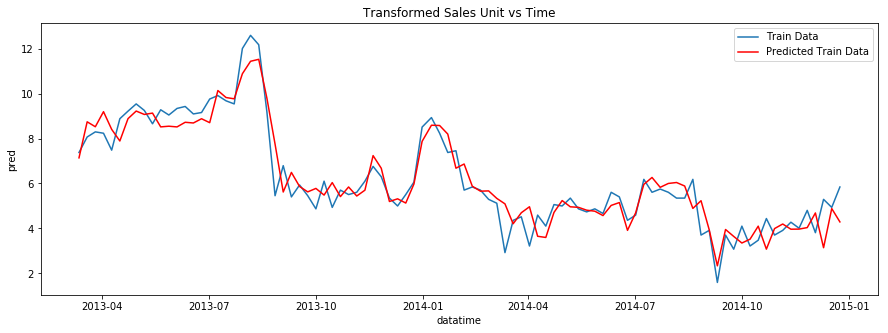

In [54]:
X_train['datatime']=pd.to_datetime(X_train.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_train.week_no.mul(7).astype(str) + ' days')

X_train['y'] = y
X_train['pred'] = trainop


plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='y', data = X_train, label = 'Train Data')
sns.lineplot(x='datatime', y='pred', data = X_train, color ='red', label = 'Predicted Train Data')
ax.legend()
ax.set_title("Transformed Sales Unit vs Time")
plt.show()

##### Transformations Used:
Used the following transformations to variables before performing model fit:

- Transform target variable with following Rule $\text {Sales Units} = (\text{Sales Unit}^.2 - 1)/.2$. This performed best in comparision will all other transformation like log, square root etc.

- Removed Outliers in Sales Units. Any value beyond $mean \pm 3 \sigma$ was replaced with the upper capped value $mean \pm 3 \sigma$

- Transform Lagged Sales with following Rule $\text {Sales Units Lagged} = (\text{Sales Unit Lagged}^.2 - 1)/.2$. Did not remove outlier from this value.

- Transform Age variable with following Rule $\text {Age} = (\text{Age}^.5 - 1)/.5$


##### Performing Model Fit
- From the plots above and the Adjusted R-square score (.8751) we can conclude that this is a pretty good model to describe the behavior of the sales units.
- All variables are significant as seen from the p-values
- Dicussion on the validity of the model will be done on the next section


# Q-PART B-11

By analysing the models plots we can conclude the following:

- The residual plot is an approximate normal plot. There are deviations from normality for the extreme values, but this can be considered approximately normal
- The mean residual analysis is around zero only. Though there is a very slight curvature, showing there might be a better functional fit, but the curvature is very small
- Residuals are homoscedastic
- The functional form is a linear function of coefficients
- The R-Squared is vand adjested R-Squared is very high (.875) which signifies a good fit


There is correlation among dependent variable, but removing them leads to significant performance degradation. Also the p-values are low for each variable which implies they are **significant** hence we will conclude multi-collinearity is not de-stabilizing the model here.

This is a timeseries data. **Durbin Watson Test for auto-correlation gives value of 0.15, which means there is positive serial auto correlation**. The means of getting rid of this it to create complex models by introducing more variable / lagged features to remove the dependence. 

This Data has both trend and seasonality. For regression to be more effective, these two factors have to be handles by creating short term rolling lagged variables (seasonal factor) and long term rolling variables (trend) capture. STL Decomposition below shows its a multiplicative Trend and Seasonality series.

We are not going ahead and engineering for newer features for this model for this assignment and will assume we are good to use this to answer thr  remainder of the questions.

##### Seasonal Decomposition of Sales

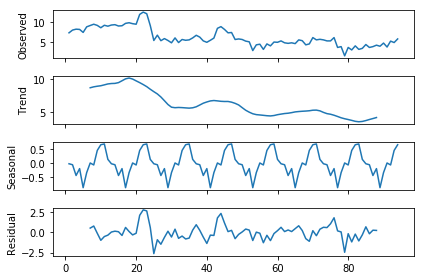

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, freq = 12)
result.plot();  # Add semi-colon to avoid creating duplicate graphs.

# Q-PART B-12

## a - Trend, Seasonality
1. Trend: The variable Age and its relationship with Sales Units is a good proxy for trend. In general the data shows negative trend with time. The correlation between Age and Sales Units is negatively correlated and that captures the trend line

2. Seasonality: this is captured:
    - Partly by regressing on the lagged last week sales units
    - Partly by the Promotion indicator

The above helps capture the seasonal trens in data

## b - Price Elasticity
The price elasticity of demand is simply a number; it is not a monetary value. What the number tells you is a 1 % decrease in price causes a y % increase in quantity demanded. 
In other words, quantity demanded’s percentage increase is greater than the percentage decrease in price.

The formula used to calculate the price elasticity of demand is:

$η = \frac{(Q_1 - Q_0)/Q_1 + Q_0)}{(P_1 - P_0)/(P_1 + P_0)}$

The symbol η represents the price elasticity of demand. The symbol $Q_0$ represents the initial quantity demanded that exists when the price equals $P_0$. The symbol $Q_1$ represents the new quantity demanded that exists when the price changes to $P_1$.

Considering Week 2, 3 Sales we will derive Price Elasticity:

- Week 2 Price = 566.3 (Discounted @.05%) = P0
- Week 3 Price = 519.5 (Discounted @.19%) = P1

- Week 2 Units Demand / Sold = 93 = Q0
- Week 3 Units Demand / Sold = 122 (Discounted @.19%) = Q1


In [56]:
P0 = 566.3
P1 = 519.5

Q0 = 93
Q1 = 122

Elasticity = ((Q1 - Q0)/(Q1 + Q0))/((P1 - P0)/(P1 + P0))
print("Price Elasticity::{}".format(Elasticity))

Price Elasticity::-3.1294176108129625


Implies 1% drop in price increases demand by 3.1%. Please note this is derived based on two point estimates and may not generalise to entire dataset

## c - Promo Indicator
The Promotion indicator indicates, that when there is Promotion on offer on an average **0.8 extra units are sold** than when there is no Promotion



# Q-PART B-13

##### Power of a Model::

Thiel's Coefficient is a good indicator to determine the effectiveness of a forecating model. It calculates the effectiveness of a model prediction against a naive model. We will consider a naive model as one that predicts the prior period value (there are other options like mean model etc. for our example we will consider the naive model forecasts the prior period value as the future value).

$\text{Theil's Coefficient (U) = } \frac{\sum_{t=1}^{n}(Actual_{t+1} - Model_{t+1})^2}{\sum_{t=1}^{n}(Actual_{t+1} - Naive_{t+1})^2}$

if U < 1, then the model is considered to be a good forecasting model and better than Naive method.

We will compute the value U over the test set (Periods from 2014 - 52 week till 3rd week of 2015). The exact values are shown in the next section. But we will use the predicted, actual and lagged values for this set.

In [57]:
X_test1 = X_test.copy()

X_test1['datatime']=pd.to_datetime(X_test1.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test1.week_no.mul(7).astype(str) + ' days')

X_test1['y'] = y_test
X_test1['pred'] = testop
X_test1['y_ac'] = (y_test*.2+1)**5
X_test1['pred_ac'] = np.ceil((X_test1['pred']*.2+1)**5)

X_test1['Actual_ModelPred_sq'] = (X_test1['sales_units'] - X_test1['pred_ac'])**2
X_test1['Actual_NaivePred_sq'] = (X_test1['sales_units'] - X_test1['lag_1_sales_unit'])**2

print("Theil's Coefficient (U) = {}".format(np.sum(X_test1['Actual_ModelPred_sq'])/np.sum(X_test1['Actual_NaivePred_sq'])))
X_test1[['week_no','year_no', 'sales_units', 'lag_1_sales_unit', 'pred_ac', 'Actual_ModelPred_sq', 'Actual_NaivePred_sq']]

Theil's Coefficient (U) = 0.5363636363636364


,week_no,year_no,sales_units,lag_1_sales_unit,pred_ac,Actual_ModelPred_sq,Actual_NaivePred_sq
95,52,2014,45,48.0,45.0,0.0,9.0
96,1,2015,44,45.0,37.0,49.0,1.0
97,2,2015,36,44.0,37.0,1.0,64.0
98,3,2015,30,36.0,33.0,9.0,36.0


The value is U < 1. Hence this is an more effective model than a Naive Model.

##### WHITE Noise wrt to Forecasting Models:
An additive forecasting model can be represented by:

$Y_t = Trend_t + Seasonal_t + Cycle_t + \epsilon_t$

where $\epsilon_t$ is the **random un-correlated changes (white noise)** with mean zero and constant variance. These are random fluctuations and cannot be explained by any factors.


# Q-PART B-14

- Since the last week sales is one of the more important factors for prediction, and it is missing for week 2-4 of test data, I will be predicting weekly sales values and use predicted value of week 1 (2014 - 52 week) as the Lageed week value for predicting week 1 of 2015, (we cannot have nulls in that column).

- This is not optimal as we will accumulate the errors in prediction, but given the situation where we are using last week sales (Lagged 1 week) as one of the key predictors, this is the only option we have.

- The following are the prediction values using this approach

,week_no,year_no,sales_units,discount_per,age,lag_1_sales_unit,lag_1_discount_per,promo_week_flg,sales_unit_t,lag_1_sales_unit_t,age_t,datatime,y,pred,y_ac,pred_ac
95,52,2014,45,0.569003,96,48.0,0.579305,1,5.705637,5.844718,17.595918,2014-12-31,5.705637,5.693053,45.0,45.0
96,1,2015,44,0.493558,97,45.0,0.569003,1,5.657628,5.705637,17.697716,2015-01-08,5.657628,5.272301,44.0,37.0
97,2,2015,36,0.491280,98,44.0,0.493558,1,5.238363,5.657628,17.798990,2015-01-15,5.238363,5.293936,36.0,37.0
98,3,2015,30,0.428839,99,36.0,0.491280,1,4.871752,5.238363,17.899749,2015-01-22,4.871752,5.002233,30.0,33.0


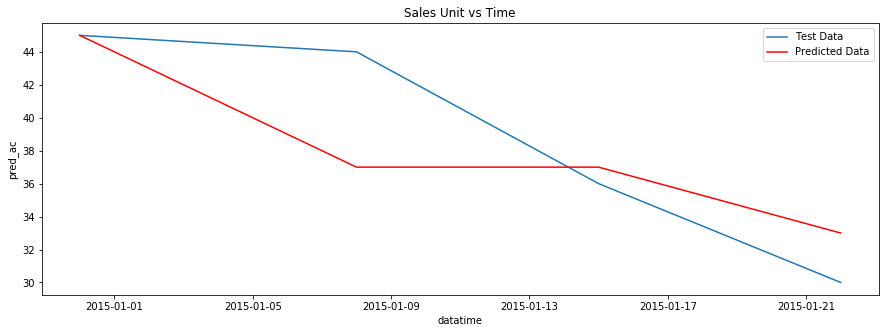

In [58]:
X_test['datatime']=pd.to_datetime(X_test.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test.week_no.mul(7).astype(str) + ' days')

X_test['y'] = y_test
X_test['pred'] = testop
X_test['y_ac'] = (y_test*.2+1)**5
X_test['pred_ac'] = np.ceil((X_test['pred']*.2+1)**5)

display(X_test)

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.lineplot(x='datatime', y='y_ac', data = X_test, label = 'Test Data')
sns.lineplot(x='datatime', y='pred_ac', data = X_test, color ='red', label = 'Predicted Data')
#ax.legend()
ax.set_title("Sales Unit vs Time")
plt.show()

##### MAPE

$MAPE = \frac{1}{n} \sum_{t=1}^n \frac{\lvert{Y_t - F_t}\rvert}{Y_t} * 100$

In [59]:
X_test1 = X_train.copy()
print(y_train.shape)
X_test1['datatime']=pd.to_datetime(X_train.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_train.week_no.mul(7).astype(str) + ' days')

X_test1['y'] = y
X_test1['pred'] = trainop
X_test1['y_ac'] = (y*.2+1)**5
X_test1['pred_ac'] = np.ceil((X_test1['pred']*.2+1)**5)

X_test1['Actual_Model_abs'] = abs(X_test1['sales_units'] - X_test1['pred_ac'])
X_test1['Actual_Model_abs_Actual'] = X_test1['Actual_Model_abs']/X_test1['sales_units']

display(X_test1[['week_no','year_no', 'sales_units', 'lag_1_sales_unit', 'pred_ac', 'Actual_Model_abs', 'Actual_Model_abs_Actual']])
def mape(x):
    return np.sum(x) * 100 / x.shape[0]

print("TRAIN MAPE = {}".format(mape(X_test1['Actual_Model_abs_Actual'])))

X_test1['Actual_Naive_abs'] = abs(X_test1['sales_units'] - X_test1['lag_1_sales_unit'])
X_test1['Actual_Naive_abs_Actual'] = X_test1['Actual_Naive_abs']/X_test1['sales_units']

print("Naive Model MAPE = {}".format(mape(X_test1['Actual_Naive_abs_Actual'])))

print("We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.")

(84,)


,week_no,year_no,sales_units,lag_1_sales_unit,pred_ac,Actual_Model_abs,Actual_Model_abs_Actual
1,10,2013,93,38.0,85.0,8.0,0.086022
2,11,2013,122,93.0,157.0,35.0,0.286885
3,12,2013,133,122.0,145.0,12.0,0.090226
4,13,2013,130,133.0,185.0,55.0,0.423077
5,14,2013,97,130.0,139.0,42.0,0.432990
6,15,2013,165,97.0,114.0,51.0,0.309091
7,16,2013,186,165.0,166.0,20.0,0.107527
8,17,2013,208,186.0,187.0,21.0,0.100962
9,18,2013,188,208.0,177.0,11.0,0.058511
10,19,2013,152,188.0,181.0,29.0,0.190789


TRAIN MAPE = 29.159952899159208
Naive Model MAPE = 41.22639743502161
We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.


In [60]:
X_test1 = X_test.copy()

X_test1['datatime']=pd.to_datetime(X_test1.year_no.astype(str), format='%Y') + \
             pd.to_timedelta(X_test1.week_no.mul(7).astype(str) + ' days')

X_test1['y'] = y_test
X_test1['pred'] = testop
X_test1['y_ac'] = (y_test*.2+1)**5
X_test1['pred_ac'] = np.ceil((X_test1['pred']*.2+1)**5)

X_test1['Actual_Model_abs'] = abs(X_test1['sales_units'] - X_test1['pred_ac'])
X_test1['Actual_Model_abs_Actual'] = X_test1['Actual_Model_abs']/X_test1['sales_units']

display(X_test1[['week_no','year_no', 'sales_units', 'lag_1_sales_unit', 'pred_ac', 'Actual_Model_abs', 'Actual_Model_abs_Actual']])
def mape(x):
    return np.sum(x) * 100 / x.shape[0]

print("TEST MAPE = {}".format(mape(X_test1['Actual_Model_abs_Actual'])))

X_test1['Actual_Naive_abs'] = abs(X_test1['sales_units'] - X_test1['lag_1_sales_unit'])
X_test1['Actual_Naive_abs_Actual'] = X_test1['Actual_Naive_abs']/X_test1['sales_units']

print("Naive Model Test MAPE = {}".format(mape(X_test1['Actual_Naive_abs_Actual'])))

print("We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.")

,week_no,year_no,sales_units,lag_1_sales_unit,pred_ac,Actual_Model_abs,Actual_Model_abs_Actual
95,52,2014,45,48.0,45.0,0.0,0.000000
96,1,2015,44,45.0,37.0,7.0,0.159091
97,2,2015,36,44.0,37.0,1.0,0.027778
98,3,2015,30,36.0,33.0,3.0,0.100000


TEST MAPE = 7.17171717171717
Naive Model Test MAPE = 12.790404040404042
We can conclude from MAPE values that our model is better than the Naive model predicting last week sales.


# Q-PART C-15

We will use non linear optimization to solve this problem (as I am unable to formulate a linear objective function for this problem)

- Index: 4 Weeks will correspond to 4 Indexes (1..4)
- Decision Variables:
    - We have considered them to be non negative
    - Demand, indexed by Index. We have 4 Demand variables for each week
    - Discount (disc) - 4 Discounts for each week. It is bounded between 10% and 60%. Please note that since the last week is not an EOSS week hence we have assumed that we can reduce the Discount at the begining of the EOSS period. It need not have to start at 57.9% or more. This rule is only factored in the EOSS period of 4 weeks
    - Sales Value - 4 for each week
    - Inventory - 4 for each week
    - Age is not considered as a decision variable, but is considered as a normal input variable, again 4 for each week
    
    
**Objective:**

- 606 is the max price per shirt.
- For each week Sales Value is calculated as : Price of shirt * (1 - Disoucnt %) * Demand for that week
- Add this for the entire EOSS 4 weeks will give us the total Sales Value for the EOSS Period

- Maximize : 606 * demand[1] * ( 1 - disc[1] ) + 606 * demand[2] * ( 1 - disc[2] ) + 606 * demand[3] * ( 1 - disc[3] ) + 606 * demand[4] * ( 1 - disc[4] )


**Constraint:**
- Inventory Constraints:
        Key : Lower : Body                                    : Upper  : Active
          1 :  -Inf :                inventory[1] - demand[1] : 2476.0 :   True
          2 :  -Inf : inventory[2] - demand[2] - inventory[1] :    0.0 :   True
          3 :  -Inf : inventory[3] - demand[3] - inventory[2] :    0.0 :   True
          4 :  -Inf : inventory[4] - demand[4] - inventory[3] :    0.0 :   True


- Constraints based on the Linear Regression Formula:
        Key : Lower : Body                                                                                                                                 : Upper : Active
          1 :  -Inf :                                                                  demand[1] - ( 1 + 0.2*( 3.38704571197895 + 3.89091*disc[1] ) )**5.0 :   0.0 :   True
          2 :  -Inf : demand[2] - ( 1 + 0.2*( 1.9203809434197776 + 3.89091*disc[2] - 3.19977*disc[1] + 2.8233999999999995*( -1 + demand[1]**0.2 ) ) )**5.0 :   0.0 :   True
          3 :  -Inf : demand[3] - ( 1 + 0.2*( 1.9015419037829964 + 3.89091*disc[3] - 3.19977*disc[2] + 2.8233999999999995*( -1 + demand[2]**0.2 ) ) )**5.0 :   0.0 :   True
          4 :  -Inf : demand[4] - ( 1 + 0.2*( 1.8827987389885315 + 3.89091*disc[4] - 3.19977*disc[3] + 2.8233999999999995*( -1 + demand[3]**0.2 ) ) )**5.0 :   0.0 :   True
    
- Discount Constraint:     
        Key : Lower : Body              : Upper : Active
          1 :   0.1 :           disc[1] :  +Inf :   True
          2 :  -Inf : disc[1] - disc[2] :   0.0 :   True
          3 :  -Inf : disc[2] - disc[3] :   0.0 :   True
          4 :  -Inf : disc[3] - disc[4] :   0.0 :   True
- Demand Constraints:
        Key : Lower : Body                     : Upper  : Active
          1 :  -Inf :                demand[1] : 2476.0 :   True
          2 :  -Inf : demand[2] - inventory[1] :    0.0 :   True
          3 :  -Inf : demand[3] - inventory[2] :    0.0 :   True
          4 :  -Inf : demand[4] - inventory[3] :    0.0 :   True

        Key  : Lower : Body                                          : Upper  : Active
        None :  -Inf : demand[1] + demand[2] + demand[3] + demand[4] : 2476.0 :   True


We will use PYOMO and Optimizer ipopt (non linear optimizer to solve the problem)


In [61]:
from pulp import *
import pyomo.environ as pe
import logging

logging.getLogger('pyomo.core').setLevel(logging.ERROR)



In [62]:
from pyomo.environ import *
from math import pi
import warnings
warnings.filterwarnings('ignore')
m = ConcreteModel()

m.a = pe.Set(initialize=[1, 2, 3, 4])
m.demand = pe.Var(m.a, bounds=(1e-20,2500))
m.disc= pe.Var(m.a, bounds=(.1,.6))
m.saleVal = pe.Var(m.a, bounds=(.6*606,606))
m.inventory = pe.Var(m.a, bounds=(1e-20,2500))

m.age = Param([1,2,3,4],  initialize={1:96, 2:97, 3:98, 4:99})

def inv_rule(m, i):
    if i ==1:
        return 2476 >= m.inventory[i] - m.demand[i]
    else:
        return m.inventory[i-1] >= m.inventory[i] - m.demand[i]
    
m.c1 = pe.Constraint(m.a, rule=inv_rule)

def demand_rule(m, i):
    if i==1:
        return m.demand[i] <= ((4.41125 + 3.89091 * m.disc[i] - 0.18602 * (m.age[i]**.5-1)/.5 
                                -3.19977 * .579 
                                + 0.56468 * (48**.2 -1)/.2+ 0.80126)*.2+1)**5
    else:
        return m.demand[i] <= ((4.41125 + 3.89091 * m.disc[i] - 0.18602 * (m.age[i]**.5-1)/.5 
                                -3.19977 * m.disc[i-1] 
                                + 0.56468 * (m.demand[i-1]**.2 -1)/.2+ 0.80126)*.2+1)**5
        
m.c2 = pe.Constraint(m.a, rule=demand_rule)

def disc_rule(m, i):
    if i ==1:
        return m.disc[i] >= .1
    else:
        return m.disc[i] >= m.disc[i-1]
    
m.c3 = pe.Constraint(m.a, rule=disc_rule)


def d_i_rule(m, i):
    if i ==1:
        return m.demand[i] <= 2476
    else:
        return m.demand[i] <= m.inventory[i-1]
    
m.c4 = pe.Constraint(m.a, rule=d_i_rule)

def d_i_rule2(m):
    return sum([m.demand[i]  for i in [1,2,3,4]]) <= 2476
m.c5 = pe.Constraint(rule=d_i_rule2)


m.o = Objective(expr= 
                (sum([m.demand[i]*(1-m.disc[i])*606 for i in [1,2,3,4]])), sense=maximize)

solver = SolverFactory('ipopt')
status = solver.solve(m)

print("Status = %s" % status.solver.termination_condition)

for i in [1,2,3,4]:
    print("%s = %f" % (m.demand, value(m.demand[i])))
    
for i in [1,2,3,4]:
    print("%s = %f" % (m.disc, value(m.disc[i])))
    
#print("%s = %f" % (m.disc, value(m.y)))
print("Objective = %f" % value(m.o))

Status = optimal
demand = 16.659688
demand = 22.480693
demand = 33.425632
demand = 41.424099
disc = 0.100000
disc = 0.150475
disc = 0.315890
disc = 0.458748
Objective = 48103.861923


In [63]:
#.pprint()

##### Analysis
We have used non-linear optimization to derive the outcome.
- The discounts offerred as per the plan:
    - Week 1 - 10%
    - Week 2 - 15%
    - Week 3 - 31%
    - Week 4 - 41%

- Units sold would be:
    - Week 1 - 16
    - Week 2 - 22
    - Week 3 - 33
    - Week 4 - 41
    
- Revenue from Sales: 48103, which is higher than 41302 which he made in reality.

Store would have sold less units 112, compared to the 159 the shop sold, but the revenue generated would have been close to 7000 more (without taking into consideration the extra profit he would make by selling the additional units for 60% discount approximately 11000). So in total, he would have made an extra 18000 by using the above optimization strategy.

# Q-2-1

##### Issues
- Data Collection: If a digital feedback form is not unavailable, collecting data can become a challenging task. Individuals may be motivated to provide feedback on digital forums / platforms than providing feedback on forms (hardcopy / portals). In such cases the following processes can be used to collect data:
    - Data can be manually collected from sources / sites
    
    This can be automated using the following options:
    - Purchase data from data providers
    - Scrape data (automated) from sites / internet (if privacy policies are not violated)
    - Digitally extracting information from scanned / handwritten documents
    
- Information Understanding: Documents can be labelled by individuals if forms / digital media does not provide direct ratings. Manually these need to be interpreted and labelled
    - Challenges: Interpretation of sentiment of a comment is subjective to an individual based on his choices and biases. This may lead to inconsistent results
    - Other challenges: Deriving actionble insights from mixed class reviews

- Language challenges:
    - Text data may have mixed language. Translation may not always provide best solutions
    - Using colloquial / vernacular languages for comments may pose challenges to data extraction
    - Spelling mistakes create challenges to context understanding

- Other Challenges:
    - Cumbersome to do analysis manually
    - Many key insights like patterns in negative sentiment over time, its trend analysis, effect of seasonality is difficult to study manually
    
##### Text Preprocessing Steps:
- Duplicate removal
- Spelling correction
- Part of Speech Tagging can be performed
- Names Entity Recognition
- Lemmatization / Stemming
- Synonym / Antonym replacements
- Special characters removal
- Stop word removal
- Tokenization (n-gram)
- Create document term matrix (using either counting methods of TFIDF)

# Q-2-2

The following EDA can be performed on text data:
- Frequency distributions:
    - Word count frequencies
    - Character count frequencies
    - Punctuation count frequencies

- Time / Trendline 
    - Word Count Distribution over the year / month / weeks / days
    - Character Count Distribution over the year / month / weeks / days
    - Date distribution - Comments pulished by Month / Date / Year
    - Publish Date Parameters distribution - Week-Day, Hour
    - Week day vs Week end distribution
    - Sentiment over Time
    
- Bag of Words / Work Cloud
    - Top Positive vs Top Negative Words Used in the headlines
    - Top Words Usage
    - N-gram Analysis
    - Topic Models Analysis

# Q-2-3

##### Feature Extraction Steps:
- Duplicate removal
- Spelling correction
- Part of Speech Tagging can be performed
- Names Entity Recognition
- Lemmatization / Stemming
- Synonym / Antonym replacements
- Special characters removal
- Stop word removal
- Tokenization (n-gram)
- Create document term matrix (using either counting methods of TFIDF)
- For more advanced processing, GLOVE embeddings can be used to embed words / sentences
- Other Statistical features:
    - Word Counts
    - Character Counts
    - Parts Of Speech Counts
    - Spelling error counts
    - Punctuation count
    - Special Characters Counts
- Depending on business context and data available many other interesting features can be extracted from text data

# Q-2-4

In [64]:
data = pd.read_excel('./ISKCON Data.xlsx', sheet_name='Data after removing duplicates')
data_raw = pd.read_excel('./ISKCON Data.xlsx', sheet_name='Raw data ')

In [65]:
data.head(3)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temp...,5,POSITIVE
2,Trip Advisor,???? ?,2016-07-28,A well maintained temple,Otherworldly vibrations throuout the sanctuary...,5,POSITIVE


In [66]:
data_raw.head(3)

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,814,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temp,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
1,1181,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temple,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
2,813,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE


In [67]:
x = data.groupby(['REVIEW TYPE'], as_index=False).size()/data.shape[0]*100
x = pd.DataFrame(x)
x.columns = ['% Distribution']
x

,% Distribution
REVIEW TYPE,
MIXED,5.968541
NEGATIVE,5.817712
NEUTRAL,1.982331
POSITIVE,86.231416


From the data distribution above we can see that the data distribution is skewed / imbalanced with 86% belonging to Positive class and merely 6% belonging to Negative and Mixed class with only 2% belonging to Neutral class.

Such imbalance at times can create problems for Models to train properly. There are several options to handle imbalanced data.

##### Sampling based methods
- We can under-sample the majority class (remove samples randomly leading to loss of information)
    - There can be many variations of the above method, like Clustering based under-sampling, Tomek based under-sampling to name a few

- We can oversample the minority class (random duplication of records, which leads to overfitting issues)
- SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

Other Advanced techniques:
- Algorithms like XGBOOST can handle class imbalance by weighing each class or row of an example to the loss function.
- Neural Networks (Keras) can do the same
- Generative Adverserial Models have been used to synthesize data and can be particularly used in cases with low minority classes (but this is at present particularly complicated with text generation and is an active area of research)

For this exercise we will be **using SMOTE to handle class imbalance problem**

# Q-2-5

- Features Engineering: We will perform the following processing on the texts:
    - Remove special characters
    - Remove puctuations
    - Remove Digits
    - Remove html if present
    - Change case to lower case
    
- Feature Extraction
    - We will use TFIDF Vectorizer to extract features

- Model Building & prediction
    - Split the data into train & test sets (7:3)
    - STEP 1:
        - We will use Naive Bayes model to build model and predict
    - STEP 2:
        - First we will use SMOTE to balance the classes
        - We will use Naive Bayes model to build model and predict

We will compare the Classification Reports of STEP 1 & STEP 2 to compare model outputs to see if SMOTE improved performance or not.

The results will be based on the Test set only


In [68]:
import nltk
nltk.data.path.append("/media/sayantan/Personal/nltk_data")
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk import word_tokenize
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re

In [69]:
def clean_text(x):
    splchars = re.compile(r'[^A-Za-z ]',re.IGNORECASE)
    x = splchars.sub('', x)
    x = word_tokenize(x.lower())
    x = [w for w in x if w not in stopwords]
    return(' '.join(x))

data.fillna('NA', inplace=True)
data['text_clean'] = data['text'].apply(lambda x: clean_text(x.lower()))

In [70]:
data.text_clean.head(3)

0    reativly new temple big hindu version disney l...
1    friends enjoyed lot iskcon temple one biggest ...
2    otherworldly vibrations throuout sanctuary exc...
Name: text_clean, dtype: object

In [71]:
stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def get_stemmed_words(doc):
    stemmed_words = [stemmer.stem(word) for word in analyzer(doc)]
    final_words = [word for word in stemmed_words if word not in stopwords]
    return final_words

In [72]:
count_vec_v1 = TfidfVectorizer(tokenizer=get_stemmed_words, stop_words=stopwords, max_df= .7, min_df=5, 
                               ngram_range=(1,2), max_features=5000)

- Typical issues with miss-spelling can be seen below
- The only way to fix these issues are manual correction of data. For this assignment we are not going ahead with additional clean up exercise and will use the same data to answer the other questions

In [73]:
count_vec_dict = count_vec_v1.fit(data.text_clean)
reviews_text_vec = count_vec_v1.transform(data.text)
df_reviews = pd.DataFrame(reviews_text_vec.toarray())
df_reviews.columns = count_vec_dict.get_feature_names()
df_reviews.head()

aarati  aarthi  aarti  aarti even  aarti time  abl  abod  absolut   ac  \
0     0.0     0.0    0.0         0.0         0.0  0.0   0.0      0.0  0.0   
1     0.0     0.0    0.0         0.0         0.0  0.0   0.0      0.0  0.0   
2     0.0     0.0    0.0         0.0         0.0  0.0   0.0      0.0  0.0   
3     0.0     0.0    0.0         0.0         0.0  0.0   0.0      0.0  0.0   
4     0.0     0.0    0.0         0.0         0.0  0.0   0.0      0.0  0.0   

     accept    access  accessori  accommod  accord  accordingli  across  \
0  0.138921  0.000000        0.0       0.0     0.0          0.0     0.0   
1  0.000000  0.000000        0.0       0.0     0.0          0.0     0.0   
2  0.000000  0.303034        0.0       0.0     0.0          0.0     0.0   
3  0.000000  0.000000        0.0       0.0     0.0          0.0     0.0   
4  0.000000  0.000000        0.0       0.0     0.0          0.0     0.0   

   across india  activ  activ go  actual   ad  add  addit  administr  admir  \
0           0.0    0.0       0.0     0.0  0.0  0.0    0.0        0.0    0.0   
1           0.0    0.0       0.0     0.0  0.0  0.0    0.0        0.0    0.0   
2           0.0    0.0       0.0     0.0  0.0  0.0    0.0        0.0    0.0   
3           0.0    0.0       0.0     0.0  0.0  0.0    0.0        0.0    0.0   
4           0.0    0.0       0.0     0.0  0.0  0.0    0.0        0.0    0.0   

   ador  adorn  adult  advanc  advantag  advic  advis  aesthet  afford  \
0   0.0    0.0    0.0     0.0       0.0    0.0    0.0      0.0     0.0   
1   0.0    0.0    0.0     0.0       0.0    0.0    0.0      0.0     0.0   
2   0.0    0.0    0.0     0.0       0.0    0.0    0.0      0.0     0.0   
3   0.0    0.0    0.0     0.0       0.0    0.0    0.0      0.0     0.0   
4   0.0    0.0    0.0     0.0       0.0    0.0    0.0      0.0     0.0   

   afternoon  age  ago  agre  ahead  air  airport  akshay  akshay patra  \
0        0.0  0.0  0.0   0.0    0.0  0.0      0.0     0.0           0.0   
1        0.0  0.0  0.0   0.0    0.0  0.0      0.0     0.0           0.0   
2        0.0  0.0  0.0   0.0    0.0  0.0      0.0     0.0           0.0   
3        0.0  0.0  0.0   0.0    0.0  0.0      0.0     0.0           0.0   
4        0.0  0.0  0.0   0.0    0.0  0.0      0.0     0.0           0.0   

   akshaya  akshaya patra  akshayapatra  alik  allow  allow insid  allow take  \
0      0.0            0.0           0.0   0.0    0.0          0.0         0.0   
1      0.0            0.0           0.0   0.0    0.0          0.0         0.0   
2      0.0            0.0           0.0   0.0    0.0          0.0         0.0   
3      0.0            0.0           0.0   0.0    0.0          0.0         0.0   
4      0.0            0.0           0.0   0.0    0.0          0.0         0.0   

   allow templ  almighti    almost  almost everyth  alon  along  along famili  \
0          0.0       0.0  0.115081             0.0   0.0    0.0           0.0   
1          0.0       0.0  0.000000             0.0   0.0    0.0           0.0   
2          0.0       0.0  0.000000             0.0   0.0    0.0           0.0   
3          0.0       0.0  0.000000             0.0   0.0    0.0           0.0   
4          0.0       0.0  0.000000             0.0   0.0    0.0           0.0   

   along way  alreadi  also  also avail  also beauti  also buy  also food  \
0        0.0      0.0   0.0         0.0          0.0       0.0        0.0   
1        0.0      0.0   0.0         0.0          0.0       0.0        0.0   
2        0.0      0.0   0.0         0.0          0.0       0.0        0.0   
3        0.0      0.0   0.0         0.0          0.0       0.0        0.0   
4        0.0      0.0   0.0         0.0          0.0       0.0        0.0   

   also get  also good  also huge  also lot  also nice  also offer  also one  \
0       0.0        0.0        0.0       0.0        0.0         0.0       0.0   
1       0.0        0.0        0.0       0.0        0.0         0.0       0.0   
2       0.0        0.0        0.0       0

In [74]:
#df_reviews.shape

In [75]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

- We will factorize the target variable and run a naive bayes model on the data
- Before running the Model we will split the data into Train and Test Sets (Ratio 70:30)
- All est results are for the Test set

In [76]:
y = data['REVIEW TYPE'].factorize()
y[1]

Index(['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL'], dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_reviews.values, y[0], train_size = 0.8, random_state = 42, stratify=y[0]) 

In [78]:
bayes_clf = BernoulliNB()
bayes_clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [79]:
pred = bayes_clf.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, precision_recall_curve

x = pd.DataFrame(confusion_matrix(y_test, pred, (0,1,2,3)))
x.columns = ['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL']
x.index = ['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL']
x

,NEGATIVE,POSITIVE,MIXED,NEUTRAL
NEGATIVE,9,33,12,0
POSITIVE,14,713,71,3
MIXED,3,32,21,0
NEUTRAL,2,11,5,0


In [81]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.32      0.17      0.22        54
           1       0.90      0.89      0.90       801
           2       0.19      0.38      0.25        56
           3       0.00      0.00      0.00        18

   micro avg       0.80      0.80      0.80       929
   macro avg       0.35      0.36      0.34       929
weighted avg       0.81      0.80      0.80       929



We will try to improve the above results by trying to balance the target class. We will use SMOTE to balance the dataset

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))


After OverSampling, the shape of train_X: (12804, 3692)
After OverSampling, the shape of train_y: (12804,) 

After OverSampling, counts of label '1': 3201
After OverSampling, counts of label '0': 3201
After OverSampling, counts of label '2': 3201
After OverSampling, counts of label '3': 3201


In [84]:
x = pd.DataFrame(confusion_matrix(y_test, pred, (0,1,2,3)))
x.columns = ['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL']
x.index = ['NEGATIVE', 'POSITIVE', 'MIXED', 'NEUTRAL']
x

,NEGATIVE,POSITIVE,MIXED,NEUTRAL
NEGATIVE,9,33,12,0
POSITIVE,14,713,71,3
MIXED,3,32,21,0
NEUTRAL,2,11,5,0


In [85]:
bayes_clf = BernoulliNB()
bayes_clf.fit(X_train_res, y_train_res)
pred = bayes_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.39      0.28      0.33        54
           1       0.91      0.93      0.92       801
           2       0.21      0.27      0.23        56
           3       0.00      0.00      0.00        18

   micro avg       0.83      0.83      0.83       929
   macro avg       0.38      0.37      0.37       929
weighted avg       0.82      0.83      0.83       929



As we can clearly see above using SMOTE we can improve the overall model performace. 
Few things of note:
- This is not the best possible model. The assumption here is accuracy is not important and hence I will refrain from tuning this model any further
- This data can be used to generate further improved predictions by performing the following:
    - We can clearly see the same word 'AARTI' is written in quite a few ways. This is a typical example of mis-spelling. Spelling have to be corrected. Some corrections can be automated, while some have to be manually editted in case of Vernacular words being used etc.
    - Adding Statistical features like count of words, characters, Whole UPPER Case letter, use of capitalization, use of puctuation, special characters as features in many situtaions improve the performances.
    - Moreover GLOVE embeddings and more advanced models like Neural Networks or GBTs will surely improve further performance

# Q-2-6

There are two major approaches to sentiment analysis.

- Supervised machine learning or deep learning approaches
- Unsupervised lexicon-based approaches

For the first approach we typically need pre-labeled data. (exactly what we did for above solution).

In the second scenario, we do not have the convenience of a well-labeled training dataset. Hence, we will need to use unsupervised techniques for predicting the sentiment by using knowledgebases, ontologies, databases, and lexicons that have detailed information, specially curated and prepared just for sentiment analysis. A lexicon is a dictionary, vocabulary, or a book of words. In this case, lexicons are special dictionaries or vocabularies that have been created for analyzing sentiments. Most of these lexicons have a list of positive and negative polar words with some score associated with them, and using various techniques like the position of words, surrounding words, context, parts of speech, phrases, and so on, scores are assigned to the text documents for which we want to compute the sentiment. After aggregating these scores, we get the final sentiment.

NLTK VADER is an example of an Lexicon based sentiment analyser

# Q-2-7

Since there is no labeled dataset for emotions, we will be using a Lexical based NRC emotion vocabulary to solve this problem

- Features Engineering: We will perform the following processing on the texts:
    - Remove special characters
    - Remove puctuations
    - Remove Digits
    - Remove html if present
    - Change case to lower case

- Emotion Extraction: The we will use NRC lexical analysis to extract the emotion / words from the corpus
- Plots
    - Emotion chart
    - Sentiment Chart as derived from Lexical analysis
    - Work vs Emotion mapping


Each comment Emotion can be identified by consider the maximum presence of any category of emotion. This is not the optimal solution, but since Lexical solutions are based on words, hence the outputs are based on word associations. Sentences / Paragraphs can be associated by summing up the individual word emotions. 


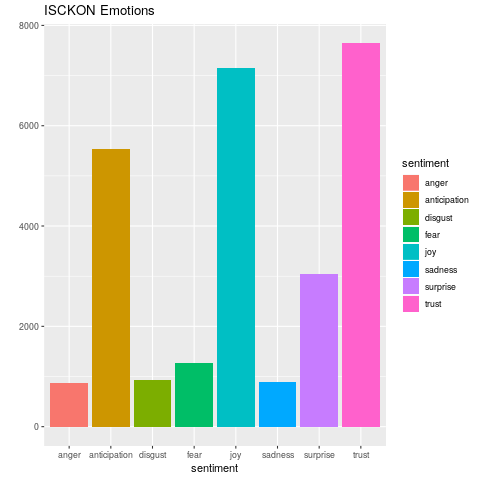

In [86]:
%%R -o data,result,new_result 
library(data.table)
library(syuzhet)
library(tm)
library(ggplot2)
library(SnowballC)


data = fread('./ISKCON.csv')

# Function for data cleaning
f_clean_tweets <- function (tweets) {
  
  clean_tweets = tweets
  # remove retweet entities
  clean_tweets = gsub('(RT|via)((?:\\b\\W*@\\w+)+)', '', clean_tweets)
  # remove at people
  clean_tweets = gsub('@\\w+', '', clean_tweets)
  # remove punctuation
  clean_tweets = gsub('[[:punct:]]', '', clean_tweets)
  # remove numbers
  clean_tweets = gsub('[[:digit:]]', '', clean_tweets)
  # remove html links
  clean_tweets = gsub('http\\w+', '', clean_tweets)
  # remove unnecessary spaces
  clean_tweets = gsub('[ \t]{2,}', '', clean_tweets)
  clean_tweets = gsub('^\\s+|\\s+$', '', clean_tweets)
  # remove emojis or special characters
  clean_tweets = gsub('<.*>', '', enc2native(clean_tweets))
  
  clean_tweets = tolower(clean_tweets)
  
  clean_tweets
}

data[, clean_text := f_clean_tweets(text)]

result <- get_nrc_sentiment((data$clean_text))
#print(dim(result))
#print(head(result))

#change result from a list to a data frame and transpose it 
result1<-data.frame(t(result))
#rowSums computes column sums across rows for each level of a #grouping variable.
new_result <- data.frame(rowSums(result1))
#name rows and columns of the dataframe
names(new_result)[1] <- "count"
new_result <- cbind("sentiment" = rownames(new_result), new_result)
rownames(new_result) <- NULL
#plot the first 8 rows,the distinct emotions
qplot(sentiment, data=new_result[1:8,], weight=count, geom="bar",fill=sentiment)+ggtitle("ISCKON Emotions")

#plot the last 2 rows ,positive and negative
#qplot(sentiment, data=new_result[9:10,], weight=count, geom="bar",fill=sentiment)+ggtitle("TedTalk Sentiments")

#print(sum(new_result$count))

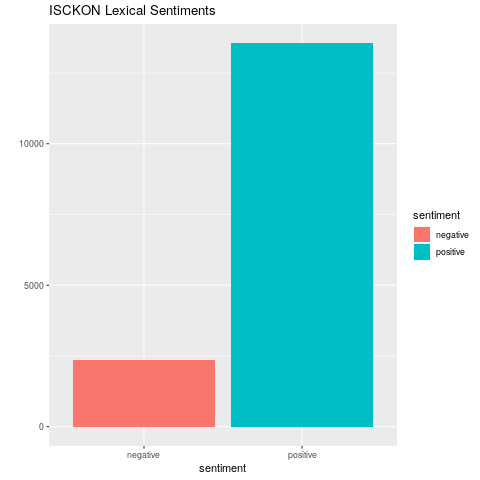

In [87]:
%%R -i data,result,new_result 


library(data.table)
library(syuzhet)
library(tm)
library(ggplot2)
library(SnowballC)

qplot(sentiment, data=new_result[9:10,], weight=count, geom="bar",fill=sentiment)+ggtitle("ISCKON Lexical Sentiments")


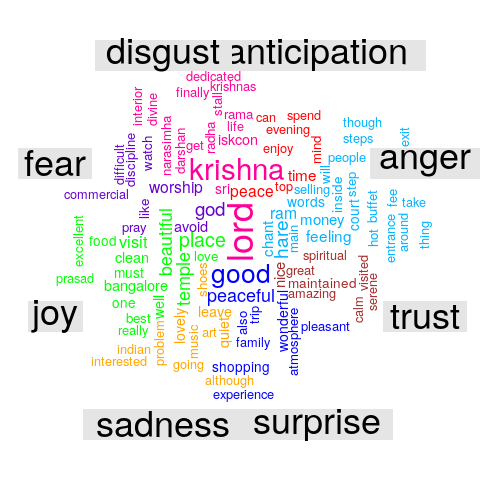

In [88]:
%%R -i data,result,new_result 

library(data.table)
library(syuzhet)
library(tm)
library(ggplot2)
library(SnowballC)
library(wordcloud)

all = c(
  paste(data$clean_text[result$anger > 0], collapse=" "),
  paste(data$clean_text[result$anticipation > 0], collapse=" "),
  paste(data$clean_text[result$disgust > 0], collapse=" "),
  paste(data$clean_text[result$fear > 0], collapse=" "),
  paste(data$clean_text[result$joy > 0], collapse=" "),
  paste(data$clean_text[result$sadness > 0], collapse=" "),
  paste(data$clean_text[result$surprise > 0], collapse=" "),
  paste(data$clean_text[result$trust > 0], collapse=" ")
)
all <- removeWords(all, stopwords("english"))
# create corpus
corpus = Corpus(VectorSource(all))
#
# create term-document matrix
tdm = TermDocumentMatrix(corpus)
#
# convert as matrix
tdm = as.matrix(tdm)
tdm1 <- tdm[nchar(rownames(tdm)) < 11,]
#
# add column names
colnames(tdm) = c('anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust')
colnames(tdm1) <- colnames(tdm)
comparison.cloud(tdm1, random.order=FALSE,
                 colors = c("#00B2FF", "red", "#FF0099", "#6600CC", "green", "orange", "blue", "brown"),
                 title.size=3, max.words=100, scale=c(3, 1),rot.per=0.4)

# Q-2-8

##### Overall Insights

- More visitors have positive sentiments about their visits
- Feeling of JOY and TRUST far outweighs negative emotions
- There is a sizable community of visitors who have expressed ANTICIPATION and SURPRISE
- FEAR, ANGER, SADNESS are relatively less evident but present in many visitors

# Q-2-9

##### Strategy
##### IT Strategy
- The data collection process needs to be automated
- Sample check of labeled data for validation needs to be performed
- Deployed solution outputs should be made aaccessible / available to public relationship management team

##### Action Strategy based on Models output
- Identify negative and passive individuals / reviews
- Identify the context for negativity
- Charter a course of action to counter the negativity
    - If services need improvents, devise  a strategy for same
    - If its a perception based comment (like too much commercialization), then explain the reason for need for money (the purpose of ISCKON and the various charitable activities and the contribution of the stores to such activities should be explained to people).
- Public relationship management team should be posting approprite replies to negative / passive comments (with envisoned improvement strategy / explaining the need for the stalls etc.)


# Q-3

Steps:
- We will create a DF with all possible words
- We will only keep the necessary words as stated in the question
- Build the Model and predict

For missing Phrases we use Laplacian smooting. Laplacian smoothing for Bernoulli document model is to add 1 to the numerator to avoid zeroes and add 2 to the denominator since we have 2 outcomes occurrence and non-ccurrence.


Bayes formula gets us : 
$p\left(y|x\right)=\frac{p\left(x|y\right)p\left(y\right)}{p\left(x\right)}$


The Naive Bayes method consists in assuming that the features $x_{i}$ are all conditionally independent from the class, hence :

$p\left(x|y\right)=\prod_{i=1}^{p}p\left(x_{i}|y\right)$

Then, the Bayes formula gives us:
\begin{equation*}
p\left(y|x\right)=\frac{p\left(y\right) \prod_{i=1}^{p}p\left(x_{i}|y\right)}{p\left(x\right)}=\frac{p\left(y\right)\prod_{i=1}^{p}p\left(x_{i}|y\right)}{\sum_{y'} p\left(y'\right)\prod_{i=1}^{p}p\left(x_{i}|y'\right)}
\end{equation*}




In [89]:
data = ["Service was very good. Excellent breakfast in beautiful restaurant included in price. I was happy there and extended my stay for extra two days.",
        "Really helpful staff, the room was clean, beds really comfortable. Great roof top restaurant with yummy food and very friendly staff.",
        "Good location. The Cleanliness part was superb.",
        "I stayed for two days in deluxe A/C room (Room no. 404). I think it is renovated recently. Staff behaviour, room cleanliness all are fine.",
        "The room and public spaces were infested with mosquitoes. I killed a dozen or so in my room prior to sleeping but still woke up covered in bites.",
        "Unfriendly staff with no care for guests.",
        "Very worst and bad experience, Service I got from the hotel reception is too worst and typical.",
        "Good location but the staff was unfriendly"
       ]

data = pd.DataFrame(data)
data.columns = ['text']
data['sentiment'] = [1,1,1,1,0,0,0,-3]

In [90]:
def clean_text(x):
    splchars = re.compile(r'[^A-Za-z ]',re.IGNORECASE)
    x = splchars.sub('', x)
    x = word_tokenize(x.lower())
    x = [w for w in x if w not in stopwords]
    return(' '.join(x))

data.fillna('NA', inplace=True)
data['text_clean'] = data['text'].apply(lambda x: clean_text(x.lower()))
  
count_vec_v1 = CountVectorizer(stop_words=stopwords, 
                               ngram_range=(1,2), max_features=5000)
                               
count_vec_dict = count_vec_v1.fit(data.text_clean)
reviews_text_vec = count_vec_v1.transform(data.text)
df_reviews = pd.DataFrame(reviews_text_vec.toarray())
df_reviews.columns = count_vec_dict.get_feature_names()

print("Data with all possible 1,2 Grams.")
df_reviews.head()                               

Data with all possible 1,2 Grams.


,ac,ac room,bad,bad experience,beautiful,beautiful restaurant,beds,beds really,behaviour,behaviour room,bites,breakfast,breakfast beautiful,care,care guests,clean,clean beds,cleanliness,cleanliness fine,cleanliness part,comfortable,comfortable great,covered,covered bites,days,days deluxe,deluxe,deluxe ac,dozen,dozen room,excellent,excellent breakfast,experience,experience service,extended,extended stay,extra,extra two,fine,food,food friendly,friendly,friendly staff,good,good excellent,good location,got,got hotel,great,great roof,guests,happy,happy extended,helpful,helpful staff,hotel,hotel reception,included,included price,infested,infested mosquitoes,killed,killed dozen,location,location cleanliness,location staff,mosquitoes,mosquitoes killed,part,part superb,price,price happy,prior,prior sleeping,public,public spaces,really,really comfortable,really helpful,recently,recently staff,reception,reception worst,renovated,renovated recently,restaurant,restaurant included,restaurant yummy,roof,roof top,room,room clean,room cleanliness,room prior,room public,room room,room think,service,service good,service got,sleeping,sleeping still,spaces,spaces infested,staff,staff behaviour,staff care,staff room,staff unfriendly,stay,stay extra,stayed,stayed two,still,still woke,superb,think,think renovated,top,top restaurant,two,two days,typical,unfriendly,unfriendly staff,woke,woke covered,worst,worst bad,worst typical,yummy,yummy food
0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [91]:
columns = ['Beautiful', 'Good Service', 'Good Location', 'Superb', 'Cleanliness', 'Mosquitoes', 
           'Unfriendly', 'bad experience']
columns = [c.lower() for c in columns]

print("Phrases / Words to consider")
columns

Phrases / Words to consider


['beautiful',
 'good service',
 'good location',
 'superb',
 'cleanliness',
 'mosquitoes',
 'unfriendly',
 'bad experience']

In [92]:
df_reviews = df_reviews[list(set(columns).intersection(set(df_reviews.columns)))]

print("Train data")
df_reviews

Train data


,cleanliness,unfriendly,beautiful,good location,superb,mosquitoes,bad experience
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1
7,0,1,0,1,0,0,0


In [93]:
y_train = data.sentiment[:-1]
X_train = df_reviews.iloc[:-1,]
X_test = pd.DataFrame(df_reviews.iloc[-1,:]).T

print("Test Data")
X_test


Test Data


,cleanliness,unfriendly,beautiful,good location,superb,mosquitoes,bad experience
7,0,1,0,1,0,0,0


In [94]:
print("As we can see from above 'good service' is not available in the training set / test set and hence it will not be considered for model building")

print("building Naive Bayes Model..")

bayes_clf = BernoulliNB()
bayes_clf.fit(X_train, y_train)



As we can see from above 'good service' is not available in the training set / test set and hence it will not be considered for model building
building Naive Bayes Model..


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [95]:
pred = bayes_clf.predict_proba(X_test)
print("Probability of Negative Sentiment is : {}".format(pred[0, 0]))
print("Probability of Positive Sentiment is : {}".format(pred[0, 1]))

Probability of Negative Sentiment is : 0.5633083058452802
Probability of Positive Sentiment is : 0.43669169415472003
